In [96]:
import importlib
import BetweenCountry
import DataProcess
importlib.reload(BetweenCountry)
importlib.reload(DataProcess)

<module 'DataProcess' from 'E:\\Xiaotong\\UIUC\\FA24\\IS597\\HW\\Project\\2024Fall_projects_Olympic_Effect\\DataProcess.py'>

In [60]:
import pandas as pd

In [61]:
from DataProcess import preprocess_csv_type1
from DataProcess import preprocess_csv_type2
from DataProcess import preprocess_csv_type3
from DataProcess import preprocess_special_csv

In [97]:
from BetweenCountry import index_rename_and_calculate_growth_rate, growth_rate_plot,eight_subplots, four_plot_health
from BetweenCountry import highlight_key_correlations_all_matrices

In [63]:
from BetweenCountry import load_and_merge_data
from BetweenCountry import metric_groups, country_suffix
from BetweenCountry import calculate_correlation, compute_country_correlation_matrices
from BetweenCountry import predefined_combinations, plot_predefined_combinations_bar
from BetweenCountry import plot_all_heatmaps
from BetweenCountry import predefined_correlation_analysis

## Economic Indicator

* GDP

In [82]:
AUS_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=4
    )

CHI_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=4
    )

CAN_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['Canada'],
        year_column='Year',
        year_range=(1971, 1981),
        skip_rows=4
    )

GR_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['Greece'],
        year_column='Year',
        year_range=(1999, 2009),
        skip_rows=4
    )

KOR_GDP = preprocess_csv_type1(
    file_path='data/GDP_KOR.csv',
    date_column='Date',
    year_column='Date',
    year_range=(1983, 1993),
    skip_rows=7
)  # special csv bcs can't use the world data

ES_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['Spain'],
        year_column='Year',
        year_range=(1987, 1997),
        skip_rows=4
    )

UK_GDP = preprocess_csv_type1(
    file_path='data/GDP_UK.csv',
    date_column='Date',
    year_column='Date',
    year_range=(2007, 2017),
    skip_rows=7
)  # same as S Korean, doesn't have worldbank data

US_GDP = preprocess_csv_type3(
        file_path='data/GDP.csv',
        country_column='Country Name',
        countries=['United States'],
        year_column='Year',
        year_range=(1991, 2001),
        skip_rows=4
    )

print(AUS_GDP.head())
print(CHI_GDP.head())
print(CAN_GDP.head())
print(GR_GDP.head())
print(KOR_GDP.head())
print(ES_GDP.head())
print(UK_GDP.head())
print(US_GDP.head())

   Country Name  Year         Value
35    Australia  1995  20448.121969
36    Australia  1996  22021.783907
37    Australia  1997  23646.623046
38    Australia  1998  21479.114202
39    Australia  1999  20712.669781
   Country Name  Year        Value
43        China  2003  1288.637491
44        China  2004  1508.667916
45        China  2005  1753.414192
46        China  2006  2099.219430
47        China  2007  2693.958732
   Country Name  Year        Value
11       Canada  1971  4535.393389
12       Canada  1972  5106.737080
13       Canada  1973  5858.334073
14       Canada  1974  7056.708475
15       Canada  1975  7536.520098
   Country Name  Year         Value
39       Greece  1999  13249.663324
40       Greece  2000  12072.929357
41       Greece  2001  12549.036895
42       Greece  2002  14177.572159
43       Greece  2003  18518.378839
    Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
23  1983               87.760553          2198.9393          13.3762
24  1984  

In [83]:
# Set index to continuous int
# Find out the 2 csv have different names for 'Date' column & 'GDP' column, rename it (SK, UK)
# Sometimes the strip doesn't work in DataProcess, need to check
# Calculate growth rate per year
cleaned_df1_gdp = index_rename_and_calculate_growth_rate(
    df=AUS_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=2000,
    metric_column='GDP_per_capita')

cleaned_df2_gdp = index_rename_and_calculate_growth_rate(
    df=CHI_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=2008,
    metric_column='GDP_per_capita')

cleaned_df3_gdp = index_rename_and_calculate_growth_rate(
    df=CAN_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=1976,
    metric_column='GDP_per_capita')

cleaned_df4_gdp = index_rename_and_calculate_growth_rate(
    df=GR_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=2004,
    metric_column='GDP_per_capita')

cleaned_df5_gdp = index_rename_and_calculate_growth_rate(
    df=KOR_GDP,
    rename_dict=
        {'Date':'Year', 'Per Capita (US $)': 'GDP_per_capita'},
    host_year=1988,
    metric_column='GDP_per_capita')

cleaned_df6_gdp = index_rename_and_calculate_growth_rate(
    df=ES_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=1992,
    metric_column='GDP_per_capita')

cleaned_df7_gdp = index_rename_and_calculate_growth_rate(
    df=UK_GDP,
    rename_dict=
        {'Date':'Year', 'Per Capita (US $)': 'GDP_per_capita'},
    host_year=2012,
    metric_column='GDP_per_capita')

cleaned_df8_gdp = index_rename_and_calculate_growth_rate(
    df=US_GDP,
    rename_dict=
        {'Country Name':'Country', 'Value': 'GDP_per_capita'},
    host_year=1996,
    metric_column='GDP_per_capita')

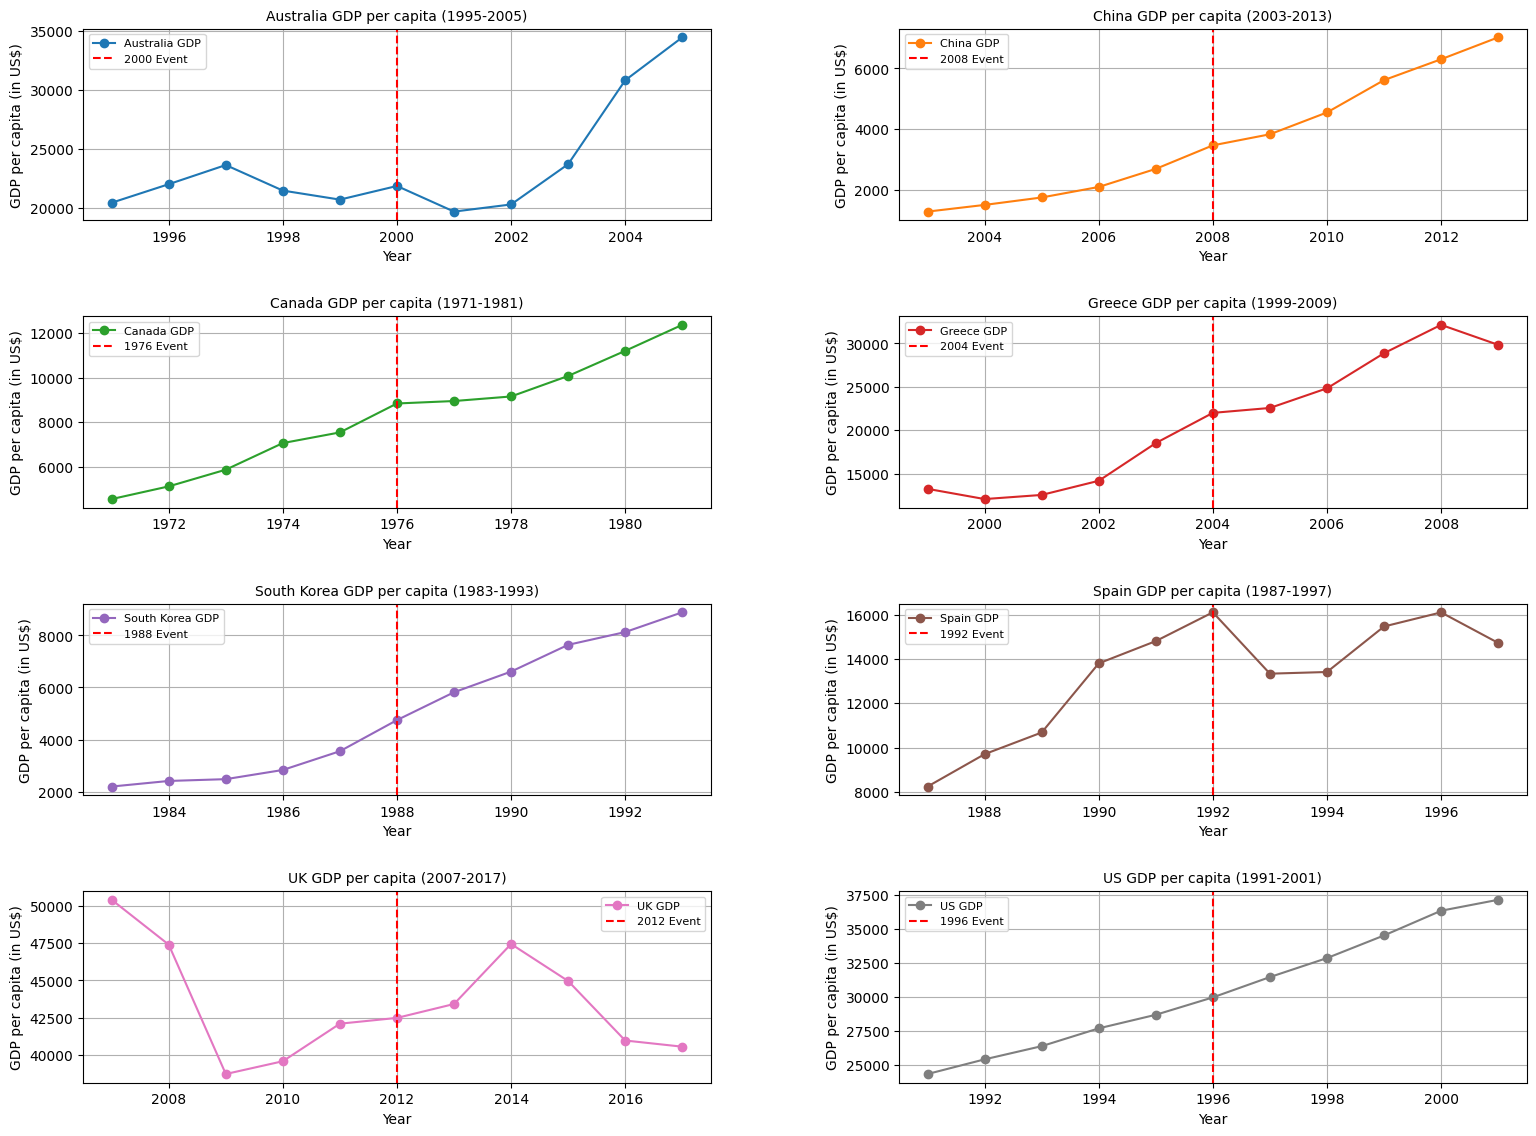

In [84]:
eight_subplots(
    dataframes=[
        cleaned_df1_gdp,  # Australia
        cleaned_df2_gdp,  # China
        cleaned_df3_gdp,  # CAN
        cleaned_df4_gdp,  # GR
        cleaned_df5_gdp,  # KOR
        cleaned_df6_gdp,  # ES
        cleaned_df7_gdp,  # UK
        cleaned_df8_gdp   # US
    ],
    host_years=[
        2000, 
        2008,  
        1976,  
        2004,  
        1988,  
        1992,  
        2012,  
        1996   
    ],
    legends=[
        "Australia GDP",
        "China GDP",
        "Canada GDP",
        "Greece GDP",
        "South Korea GDP",
        "Spain GDP",
        "UK GDP",
        "US GDP"
    ],
    titles=[
        "Australia GDP per capita (1995-2005)",
        "China GDP per capita (2003-2013)",
        "Canada GDP per capita (1971-1981)",
        "Greece GDP per capita (1999-2009)",
        "South Korea GDP per capita (1983-1993)",
        "Spain GDP per capita (1987-1997)",
        "UK GDP per capita (2007-2017)",
        "US GDP per capita (1991-2001)"
    ],
    x_column='Year',
    y_column='GDP_per_capita',
    xlabel="Year",
    ylabel="GDP per capita (in US$)"
)


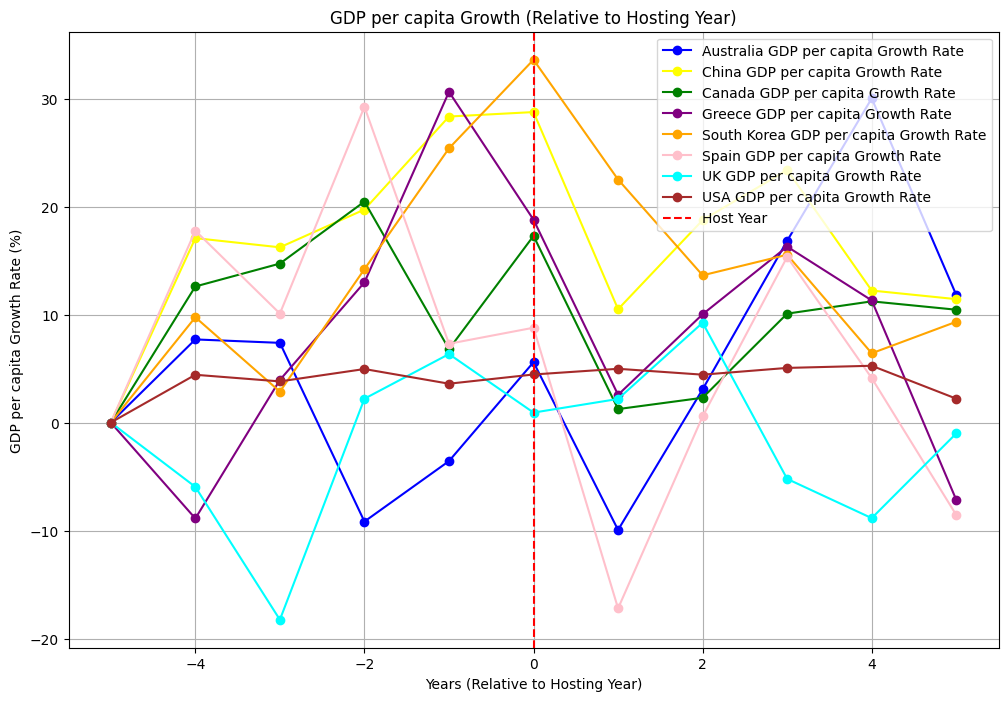

In [67]:
growth_rate_plot(
    dfs=[
        cleaned_df1_gdp,  # Australia
        cleaned_df2_gdp,  # China
        cleaned_df3_gdp,  # Canada
        cleaned_df4_gdp,  # Greece
        cleaned_df5_gdp,  # South Korea
        cleaned_df6_gdp,  # Spain
        cleaned_df7_gdp,  # UK
        cleaned_df8_gdp   # USA
    ],
    countries=[
        "Australia", "China", "Canada", "Greece",
        "South Korea", "Spain", "UK", "USA"
    ],
    metric="GDP per capita",
    colors=[
        'blue', 'yellow', 'green', 'purple',
        'orange', 'pink', 'cyan', 'brown'
    ]
)


Observation:

China (Green line) and Greece (Pink line) exhibit steep increases in GDP growth rates immediately before and during the hosting year. The sharp peak highlights strong short-term economic growth.
Post-hosting (Years +1 to +5), China shows a flattening trend, while South Korea demonstrates a significant decline in growth rates.
Developed countries like Australia (Purple line) and Canada (Green line) display smoother, even have ups and downs, showing more stable GDP growth. Australia's growth remains consistent in the medium term (3–5 years) post-hosting.

Conclusion:
The data supports the hypothesis: Emerging economies like China experience sharp short-term spikes in GDP growth but fail to sustain the momentum in the medium term.
Conversely, developed economies (Australia, Canada) demonstrate steadier and more sustainable GDP growth trends.

* Foreign Direct Investment

Foreign Direct Investment as percent of GDP (Inflow): Foreign capital entering the home country, helps boosts capital, technology, and employment

In [100]:
AUS_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['Australia'],
    year_column='Year',
    year_range=(1995, 2005),
    skip_rows=4
)

CHI_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['China'],
    year_column='Year',
    year_range=(2003, 2013),
    skip_rows=4
)

CAN_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['Canada'],
    year_column='Year',
    year_range=(1971, 1981),
    skip_rows=4
)

GR_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['Greece'],
    year_column='Year',
    year_range=(1999, 2009),
    skip_rows=4
)

KOR_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['Korea, Rep.'],
    year_column='Year',
    year_range=(1983, 1993),
    skip_rows=4
)

ES_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['Spain'],
    year_column='Year',
    year_range=(1987, 1997),
    skip_rows=4
)

UK_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['United Kingdom'],
    year_column='Year',
    year_range=(2007, 2017),
    skip_rows=4
)

US_FDI = preprocess_csv_type3(
    file_path='data/FDI.csv',
    country_column='Country Name',
    countries=['United States'],
    year_column='Year',
    year_range=(1991, 2001),
    skip_rows=4
)

# Test outputs
print(AUS_FDI.head())  # Test success for Australia
print(CHI_FDI.head())  # Test success for China
print(CAN_FDI.head())  # Test success for Canada
print(GR_FDI.head())   # Test success for Greece
print(KOR_FDI.head())  # Test success for South Korea
print(ES_FDI.head())   # Test success for Spain
print(UK_FDI.head())   # Test success for UK
print(US_FDI.head())   # Test success for USA


   Country Name  Year     Value
35    Australia  1995  3.604047
36    Australia  1996  1.137173
37    Australia  1997  1.856584
38    Australia  1998  1.900950
39    Australia  1999  0.567408
   Country Name  Year     Value
43        China  2003  3.487419
44        China  2004  3.483642
45        China  2005  4.554263
46        China  2006  4.508601
47        China  2007  4.400983
   Country Name  Year     Value
11       Canada  1971  2.282300
12       Canada  1972  1.860393
13       Canada  1973  2.416869
14       Canada  1974  2.313487
15       Canada  1975  1.941399
   Country Name  Year     Value
39       Greece  1999  0.058000
40       Greece  2000 -0.006282
41       Greece  2001  0.001468
42       Greece  2002  0.022114
43       Greece  2003  0.695798
   Country Name  Year     Value
23  Korea, Rep.  1983  0.210003
24  Korea, Rep.  1984  0.229000
25  Korea, Rep.  1985  0.350754
26  Korea, Rep.  1986  0.584151
27  Korea, Rep.  1987  0.566818
   Country Name  Year     Value
27      

In [101]:
countries_data = [
    {'name': 'Australia', 'year_range': (1995, 2005), 'host_year': 2000},
    {'name': 'China', 'year_range': (2003, 2013), 'host_year': 2008},
    {'name': 'Canada', 'year_range': (1971, 1981), 'host_year': 1976},
    {'name': 'Greece', 'year_range': (1999, 2009), 'host_year': 2004},
    {'name': 'Korea, Rep.', 'year_range': (1983, 1993), 'host_year': 1988},
    {'name': 'Spain', 'year_range': (1987, 1997), 'host_year': 1992},
    {'name': 'United Kingdom', 'year_range': (2007, 2017), 'host_year': 2012},
    {'name': 'United States', 'year_range': (1991, 2001), 'host_year': 1996}
]

processed_data = {}
cleaned_data = {}

for country_data in countries_data:
    try:
        # Preprocess FDI data
        fdi_df = preprocess_csv_type3(
            file_path='data/FDI.csv',
            country_column='Country Name',
            countries=[country_data['name']],
            year_column='Year',
            year_range=country_data['year_range'],
            skip_rows=4
        )
        
        if fdi_df.empty:
            print(f"Skipping {country_data['name']} because the DataFrame is empty.")
            continue
        
        processed_data[country_data['name']] = fdi_df
        
        cleaned_fdi_df = index_rename_and_calculate_growth_rate(
            df=fdi_df,
            rename_dict={'Country Name':'Country', 'Value': 'FDI'},
            host_year=country_data['host_year'],
            metric_column='FDI'
        )
        
        cleaned_data[country_data['name']] = cleaned_fdi_df

    except Exception as e:
        print(f"An error occurred while processing {country_data['name']}: {e}")
        continue

for country, df in cleaned_data.items():
    print(f"{country} cleaned FDI data:")
    print(df.head())
    print("\n")


Australia cleaned FDI data:
     Country  Year       FDI  Growth Rate (%)  Relative Year
0  Australia  1995  3.604047         0.000000             -5
1  Australia  1996  1.137173       -68.447322             -4
2  Australia  1997  1.856584        63.263035             -3
3  Australia  1998  1.900950         2.389683             -2
4  Australia  1999  0.567408       -70.151343             -1


China cleaned FDI data:
  Country  Year       FDI  Growth Rate (%)  Relative Year
0   China  2003  3.487419         0.000000             -5
1   China  2004  3.483642        -0.108314             -4
2   China  2005  4.554263        30.732839             -3
3   China  2006  4.508601        -1.002642             -2
4   China  2007  4.400983        -2.386931             -1


Canada cleaned FDI data:
  Country  Year       FDI  Growth Rate (%)  Relative Year
0  Canada  1971  2.282300         0.000000             -5
1  Canada  1972  1.860393       -18.486038             -4
2  Canada  1973  2.416869      

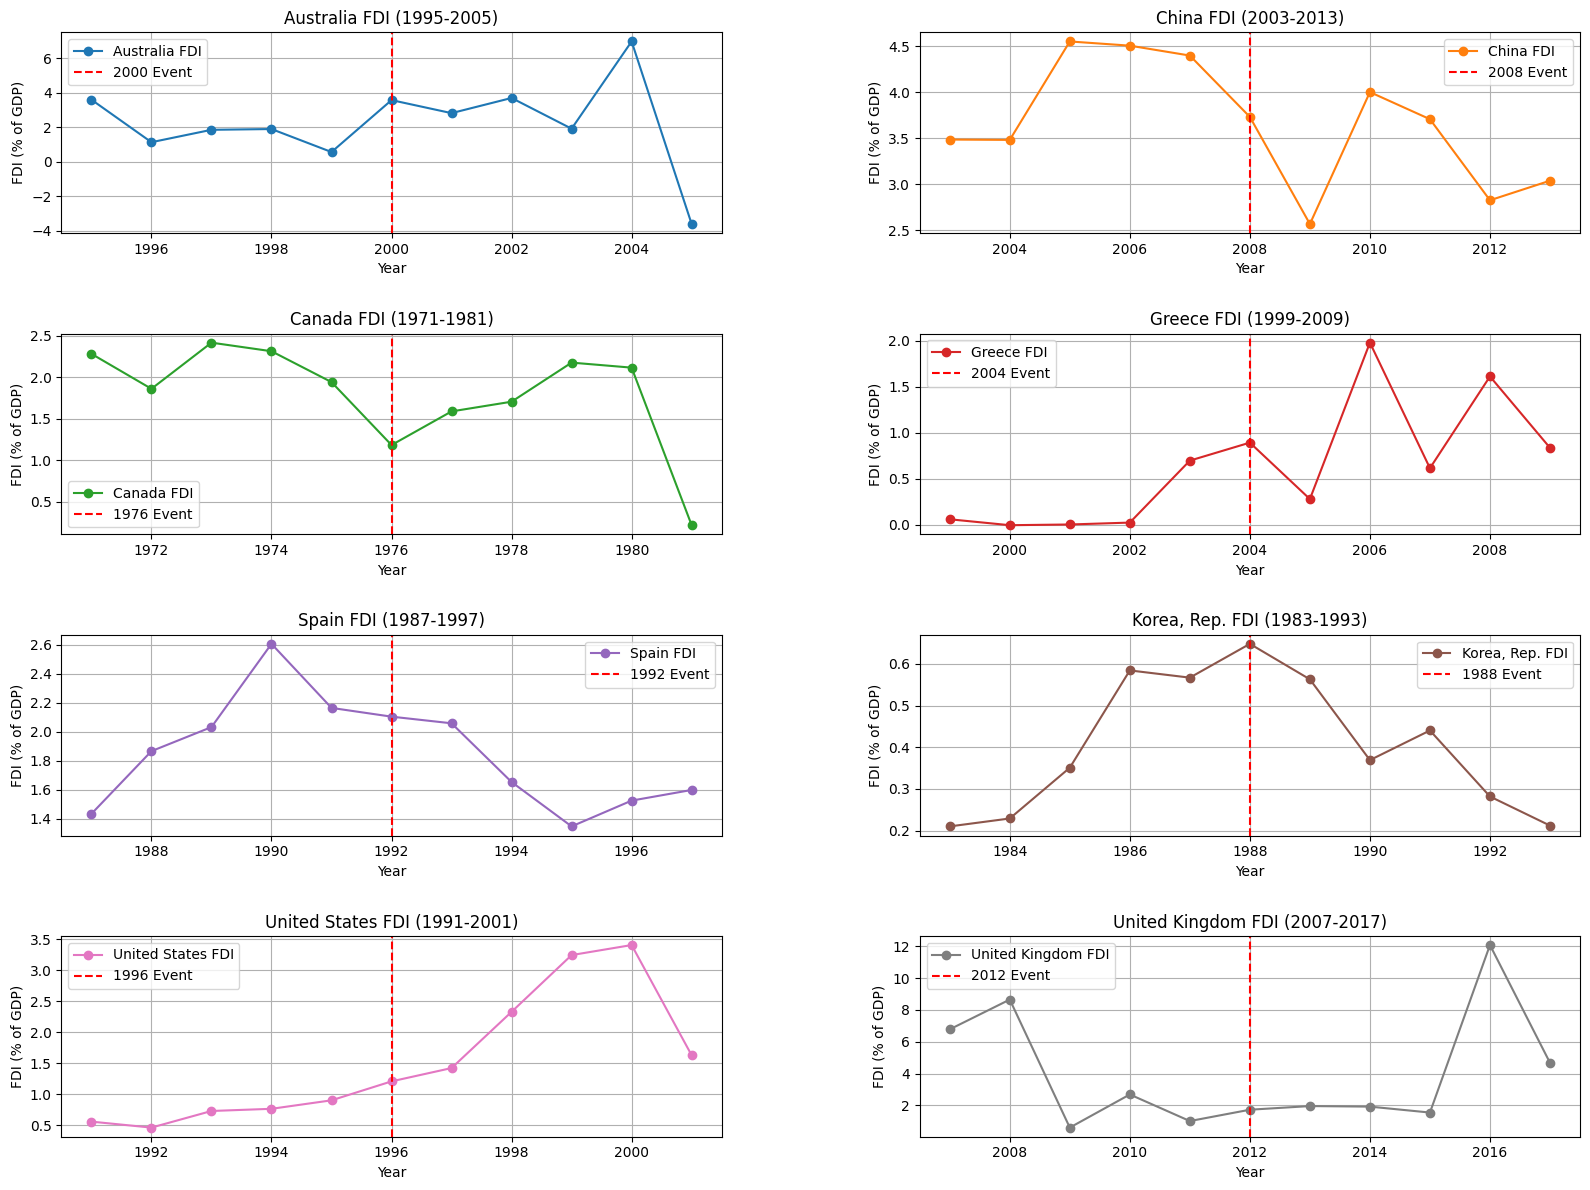

In [102]:
# Updated country names for dataset compatibility
included_countries = ["Australia", "China", "Canada", "Greece", "Spain", "Korea, Rep.", "United States", "United Kingdom"]

# Adjusted country data with updated names
updated_countries_data = [
    {'name': 'Australia', 'host_year': 2000, 'year_range': (1995, 2005)},
    {'name': 'China', 'host_year': 2008, 'year_range': (2003, 2013)},
    {'name': 'Canada', 'host_year': 1976, 'year_range': (1971, 1981)},
    {'name': 'Greece', 'host_year': 2004, 'year_range': (1999, 2009)},
    {'name': 'Spain', 'host_year': 1992, 'year_range': (1987, 1997)},
    {'name': 'Korea, Rep.', 'host_year': 1988, 'year_range': (1983, 1993)},
    {'name': 'United States', 'host_year': 1996, 'year_range': (1991, 2001)},
    {'name': 'United Kingdom', 'host_year': 2012, 'year_range': (2007, 2017)}
]

# Filter only included countries
filtered_countries = [c for c in updated_countries_data if c['name'] in included_countries]

# Ensure compatibility with cleaned_data
eight_subplots(
    dataframes=[cleaned_data[c['name']] for c in filtered_countries],
    host_years=[c['host_year'] for c in filtered_countries],
    legends=[f"{c['name']} FDI" for c in filtered_countries],
    titles=[
        f"{c['name']} FDI ({c['year_range'][0]}-{c['year_range'][1]})"
        for c in filtered_countries
    ],
    x_column="Year",
    y_column="FDI",
    xlabel="Year",
    ylabel="FDI (% of GDP)"
)


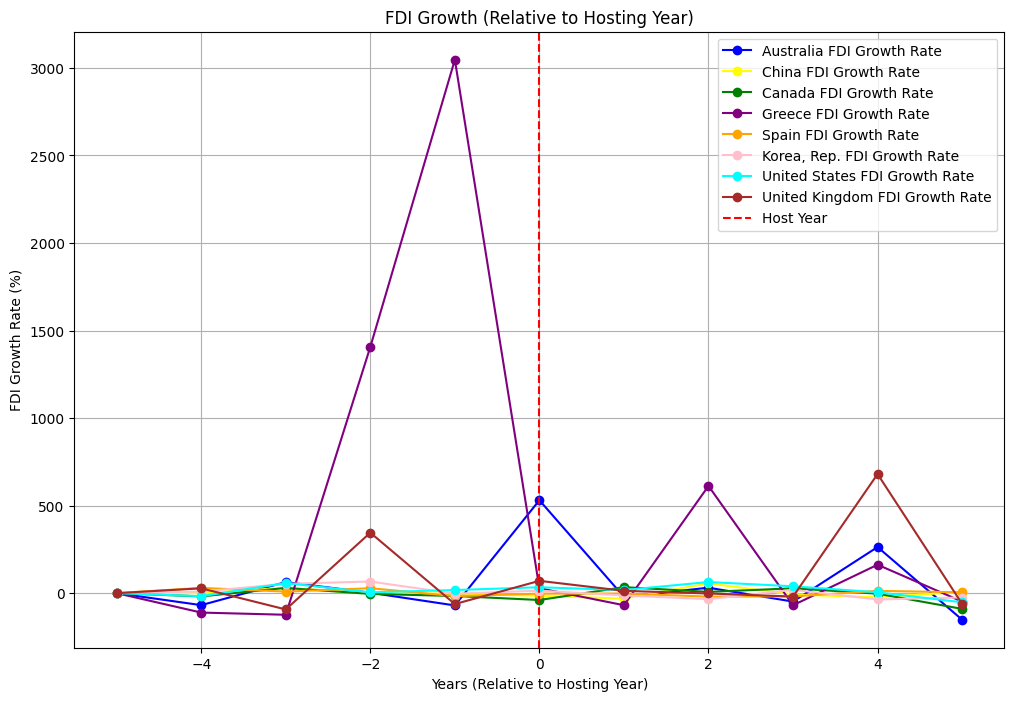

In [103]:

growth_rate_plot(
    dfs=[cleaned_data[country] for country in included_countries],
    countries=included_countries,  
    metric="FDI", 
    colors=None  
)


Greece (Purple line) shows an extreme spike in FDI growth immediately before hosting, but this collapses quickly afterward, suggesting unsustainable short-term benefits.
Australia and United Kingdom have smaller but more stable FDI growth trends. There are no extreme fluctuations, and the growth is more evenly distributed.
China (Yellow) and all other countries also maintains more moderate FDI growth but lacks significant peaks relative to Greece.

For emerging economies, like Greece, the Olympics lead to sharp FDI surges, but these benefits are short-lived.
Developed economies like Spain and Canada show a more controlled and sustained FDI, aligning with the hypothesis.

* Gov. Consumption as percent of GDP

In [93]:
AUS_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['Australia'],
    year_column='Year',
    year_range=(1995, 2005),
    skip_rows=4
)

CHI_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['China'],
    year_column='Year',
    year_range=(2003, 2013),
    skip_rows=4
)

CAN_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['Canada'],
    year_column='Year',
    year_range=(1971, 1981),
    skip_rows=4
)

GR_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['Greece'],
    year_column='Year',
    year_range=(1999, 2009),
    skip_rows=4
)

KOR_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['Korea, Rep.'],
    year_column='Year',
    year_range=(1983, 1993),
    skip_rows=4
)

ES_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['Spain'],
    year_column='Year',
    year_range=(1987, 1997),
    skip_rows=4
)

UK_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['United Kingdom'],
    year_column='Year',
    year_range=(2007, 2017),
    skip_rows=4
)

US_gov_consume = preprocess_csv_type3(
    file_path='data/Government_consumption.csv',
    country_column='Country Name',
    countries=['United States'],
    year_column='Year',
    year_range=(1991, 2001),
    skip_rows=4
)

# Test outputs
print(AUS_gov_consume.head())  
print(CHI_gov_consume.head())  
print(CAN_gov_consume.head())  
print(GR_gov_consume.head())   
print(KOR_gov_consume.head())  
print(ES_gov_consume.head())   
print(UK_gov_consume.head())   
print(US_gov_consume.head())   


   Country Name  Year      Value
35    Australia  1995  18.641272
36    Australia  1996  18.584643
37    Australia  1997  18.270594
38    Australia  1998  18.262338
39    Australia  1999  18.730732
   Country Name  Year      Value
43        China  2003  15.314209
44        China  2004  14.625342
45        China  2005  14.797663
46        China  2006  14.820516
47        China  2007  14.626762
   Country Name  Year      Value
11       Canada  1971  21.114985
12       Canada  1972  21.063435
13       Canada  1973  20.401052
14       Canada  1974  20.755576
15       Canada  1975  22.331783
   Country Name  Year      Value
39       Greece  1999  17.980073
40       Greece  2000  18.260004
41       Greece  2001  18.714975
42       Greece  2002  19.227313
43       Greece  2003  18.958854
   Country Name  Year      Value
23  Korea, Rep.  1983  11.117786
24  Korea, Rep.  1984  10.553967
25  Korea, Rep.  1985  10.616512
26  Korea, Rep.  1986  10.264231
27  Korea, Rep.  1987   9.984897
   Country

In [94]:
cleaned_df1_gov_consume = index_rename_and_calculate_growth_rate(
    df=AUS_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=2000, metric_column='Gov_Consumption'
) 

cleaned_df2_gov_consume = index_rename_and_calculate_growth_rate(
    df=CHI_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=2008, metric_column='Gov_Consumption'
) 

cleaned_df3_gov_consume = index_rename_and_calculate_growth_rate(
    df=CAN_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=1976, metric_column='Gov_Consumption'
)

cleaned_df4_gov_consume = index_rename_and_calculate_growth_rate(
    df=GR_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=2004, metric_column='Gov_Consumption'
)

cleaned_df5_gov_consume = index_rename_and_calculate_growth_rate(
    df=KOR_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=1988, metric_column='Gov_Consumption'
)

cleaned_df6_gov_consume = index_rename_and_calculate_growth_rate(
    df=ES_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=1992, metric_column='Gov_Consumption'
)

cleaned_df7_gov_consume = index_rename_and_calculate_growth_rate(
    df=UK_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=2012, metric_column='Gov_Consumption'
)

cleaned_df8_gov_consume = index_rename_and_calculate_growth_rate(
    df=US_gov_consume, rename_dict={'Country Name':'Country', 'Value': 'Gov_Consumption'}, host_year=1996, metric_column='Gov_Consumption'
)

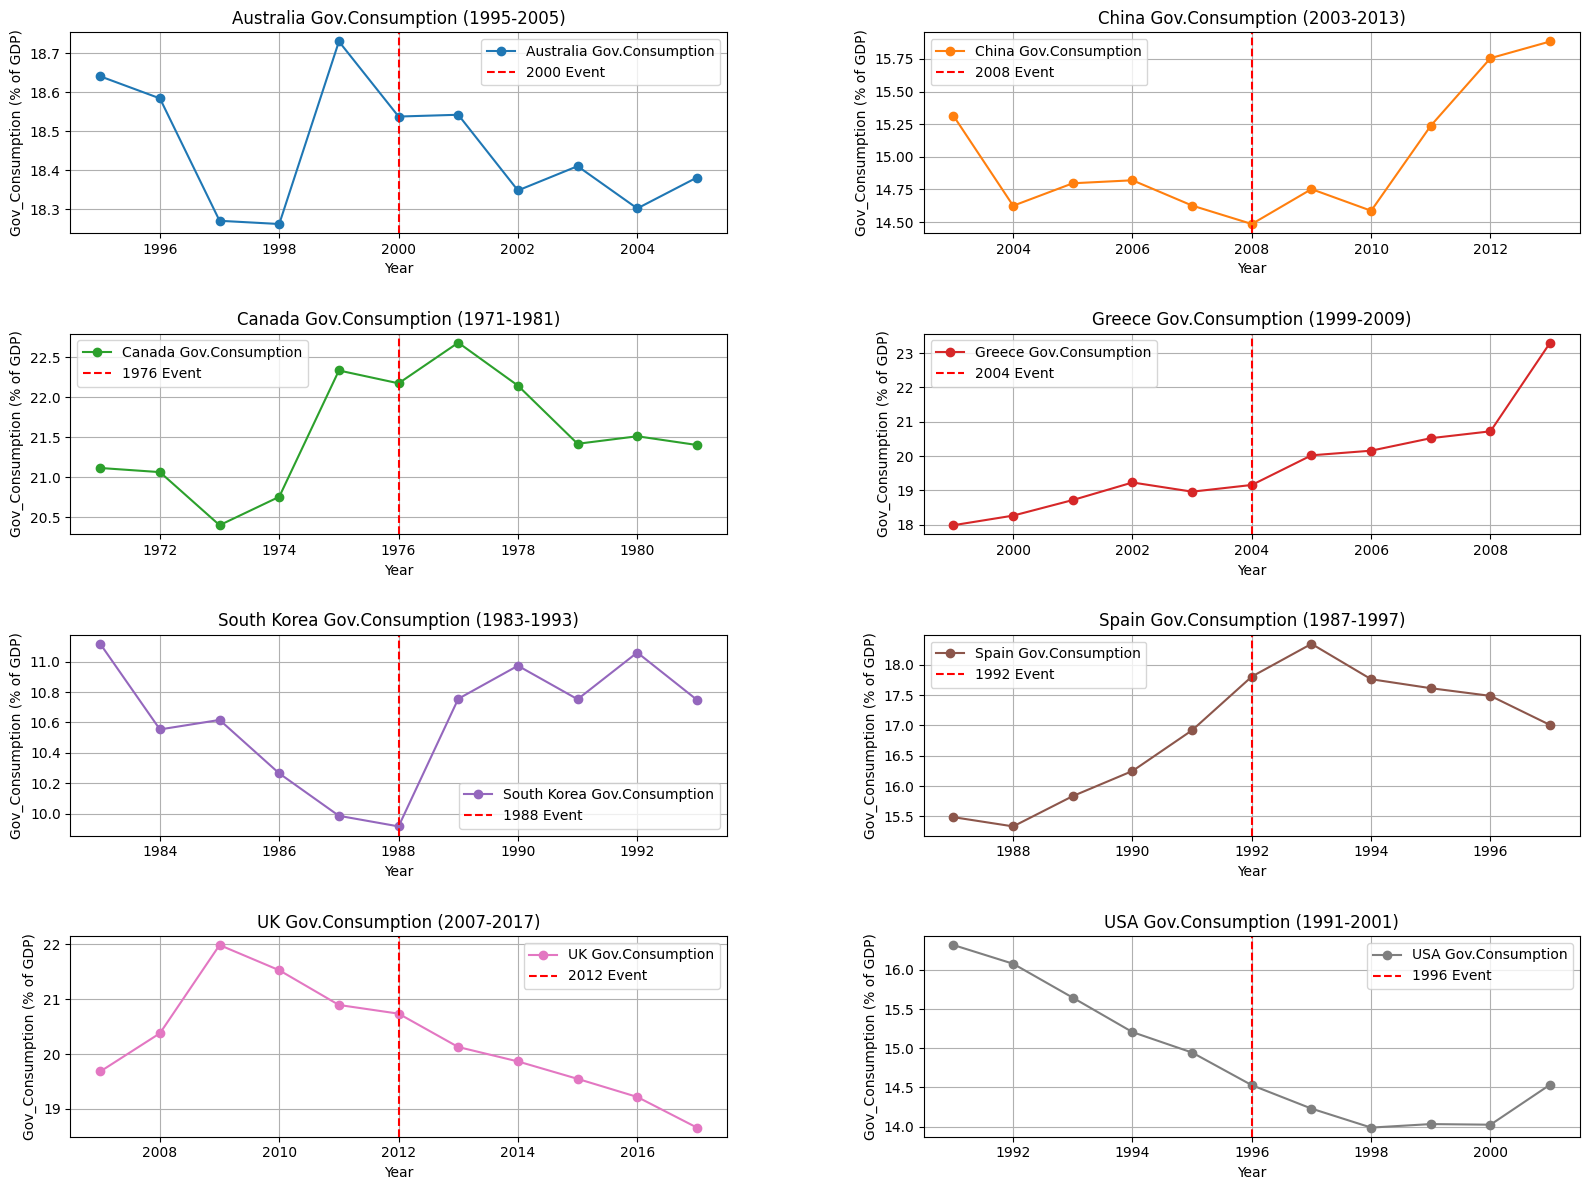

In [98]:
eight_subplots(
    dataframes=[
        cleaned_df1_gov_consume,  # Australia
        cleaned_df2_gov_consume,  # China
        cleaned_df3_gov_consume,  # CAN
        cleaned_df4_gov_consume,  # GR
        cleaned_df5_gov_consume,  # KOR
        cleaned_df6_gov_consume,  # ES
        cleaned_df7_gov_consume,  # UK
        cleaned_df8_gov_consume   # US
    ],
    host_years=[2000, 2008, 1976, 2004, 1988, 1992, 2012, 1996],
    legends=[
        "Australia Gov.Consumption",
        "China Gov.Consumption",
        "Canada Gov.Consumption",
        "Greece Gov.Consumption",
        "South Korea Gov.Consumption",
        "Spain Gov.Consumption",
        "UK Gov.Consumption",
        "USA Gov.Consumption"
    ],
    titles=[
        "Australia Gov.Consumption (1995-2005)",
        "China Gov.Consumption (2003-2013)",
        "Canada Gov.Consumption (1971-1981)",
        "Greece Gov.Consumption (1999-2009)",
        "South Korea Gov.Consumption (1983-1993)",
        "Spain Gov.Consumption (1987-1997)",
        "UK Gov.Consumption (2007-2017)",
        "USA Gov.Consumption (1991-2001)"
    ],
    x_column="Year",
    y_column="Gov_Consumption",
    xlabel="Year",
    ylabel="Gov_Consumption (% of GDP)"
)


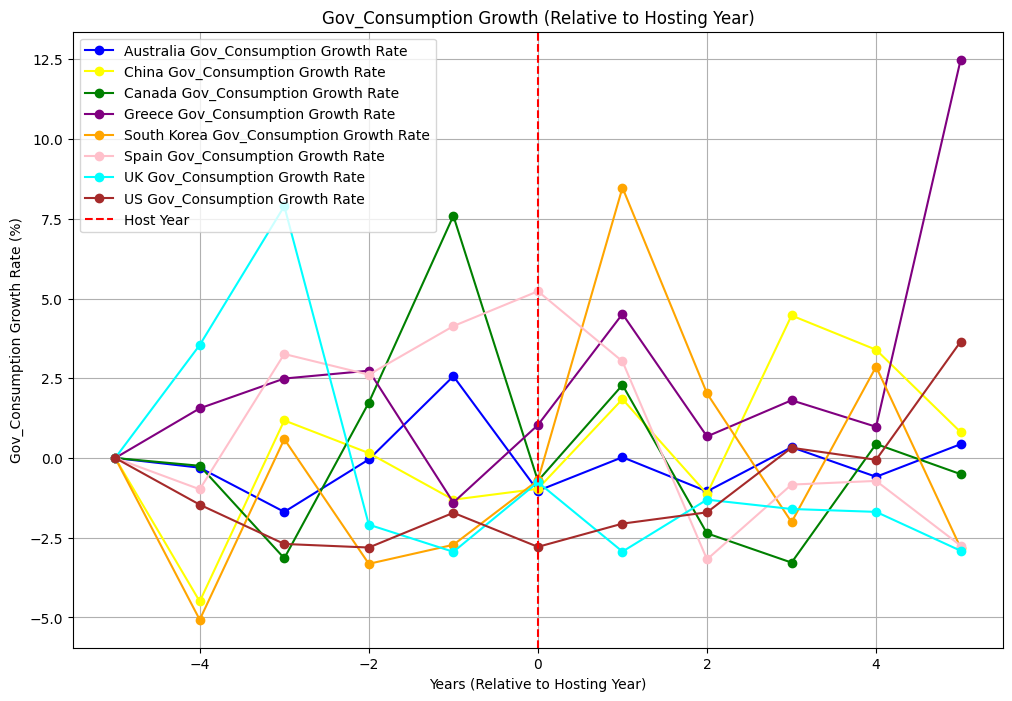

In [99]:
growth_rate_plot(
    dfs=[
        cleaned_df1_gov_consume,  # Australia
        cleaned_df2_gov_consume,  # China
        cleaned_df3_gov_consume,  # Canada
        cleaned_df4_gov_consume,  # Greece
        cleaned_df5_gov_consume,  # South Korea
        cleaned_df6_gov_consume,  # Spain
        cleaned_df7_gov_consume,  # UK
        cleaned_df8_gov_consume   # US
    ],
    countries=[
        "Australia",
        "China",
        "Canada",
        "Greece",
        "South Korea",
        "Spain",
        "UK",
        "US"
    ],
    metric="Gov_Consumption",
    colors=None  # Use default colors or specify a list of distinct colors
)


All the countries display steep increases in government consumption approaching to the hosting year. This highlights heavy short-term investment in infrastructure and services. However, some countries show sharp declines immediately during hosting year like Canada and Australia suggesting unsustainable spending patterns while other countries have steady growth after the hosting year.
Developed economies like UK and US again demonstrated more stable before the event and, sustained government expenditure, supporting the hypothesis. 

## Tourism Performance

In [108]:
AUS_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['Australia'],
    year_column='Year',
    year_range=(1995, 2005),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

CHI_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['China'],
    year_column='Year',
    year_range=(2003, 2013),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

CAN_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['Canada'],
    year_column='Year',
    year_range=(1971, 1981),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

GR_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['Greece'],
    year_column='Year',
    year_range=(1999, 2009),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

KOR_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['Korea, Rep.'],
    year_column='Year',
    year_range=(1983, 1993),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

ES_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['Spain'],
    year_column='Year',
    year_range=(1987, 1997),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

UK_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['United Kingdom'],
    year_column='Year',
    year_range=(2007, 2017),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

US_tourism = preprocess_csv_type3(
    file_path='data/tourism_data.csv',
    country_column='Country Name',
    countries=['United States'],
    year_column='Year',
    year_range=(1991, 2001),
    skip_rows=3,
    value_column='Value',
    convert_to_million=True,
    column_label='Tourism'
)

# Test outputs
print(AUS_tourism.head())  # Test for Australia
print(CHI_tourism.head())  # Test for China
print(CAN_tourism.head())  # Test for Canada
print(GR_tourism.head())   # Test for Greece
print(KOR_tourism.head())  # Test for South Korea
print(ES_tourism.head())   # Test for Spain
print(UK_tourism.head())   # Test for UK
print(US_tourism.head())   # Test for USA


   Country Name  Year  Tourism
35    Australia  1995    3.726
36    Australia  1996    4.165
37    Australia  1997    4.318
38    Australia  1998    4.167
39    Australia  1999    4.459
   Country Name  Year  Tourism
43        China  2003   91.662
44        China  2004  109.038
45        China  2005  120.292
46        China  2006  124.942
47        China  2007  131.873
   Country Name  Year  Tourism
11       Canada  1971      NaN
12       Canada  1972      NaN
13       Canada  1973      NaN
14       Canada  1974      NaN
15       Canada  1975      NaN
   Country Name  Year  Tourism
39       Greece  1999   12.606
40       Greece  2000   13.567
41       Greece  2001   14.678
42       Greece  2002   14.918
43       Greece  2003   14.785
   Country Name  Year  Tourism
23  Korea, Rep.  1983      NaN
24  Korea, Rep.  1984      NaN
25  Korea, Rep.  1985      NaN
26  Korea, Rep.  1986      NaN
27  Korea, Rep.  1987      NaN
   Country Name  Year  Tourism
27        Spain  1987      NaN
28      

In [109]:
# Valid countries to process
cleaned_df1_tour = index_rename_and_calculate_growth_rate(
    df=AUS_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=2000,
    metric_column='Num_Arrivals'
)

cleaned_df2_tour = index_rename_and_calculate_growth_rate(
    df=CHI_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=2008,
    metric_column='Num_Arrivals'
)

cleaned_df3_tour = index_rename_and_calculate_growth_rate(
    df=CAN_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=1976,
    metric_column='Num_Arrivals'
)

cleaned_df4_tour = index_rename_and_calculate_growth_rate(
    df=GR_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=2004,
    metric_column='Num_Arrivals'
)

cleaned_df5_tour = index_rename_and_calculate_growth_rate(
    df=KOR_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=1988,
    metric_column='Num_Arrivals'
)

cleaned_df6_tour = index_rename_and_calculate_growth_rate(
    df=ES_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=1992,
    metric_column='Num_Arrivals'
)

cleaned_df7_tour = index_rename_and_calculate_growth_rate(
    df=UK_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=2012,
    metric_column='Num_Arrivals'
)

cleaned_df8_tour = index_rename_and_calculate_growth_rate(
    df=US_tourism,
    rename_dict={'Tourism': 'Num_Arrivals'},
    host_year=1996,
    metric_column='Num_Arrivals'
)


# Testing outputs
print(cleaned_df1_tour.head())  # Test Australia
print(cleaned_df2_tour.head())  # Test China
print(cleaned_df3_tour.head())  # Test Canada
print(cleaned_df4_tour.head())  # Test Greece
print(cleaned_df5_tour.head())  # Test South Korean
print(cleaned_df6_tour.head())  # Spain
print(cleaned_df7_tour.head())  # UK
print(cleaned_df8_tour.head())  # US


  Country Name  Year  Num_Arrivals  Growth Rate (%)  Relative Year
0    Australia  1995         3.726         0.000000             -5
1    Australia  1996         4.165        11.782072             -4
2    Australia  1997         4.318         3.673469             -3
3    Australia  1998         4.167        -3.496989             -2
4    Australia  1999         4.459         7.007439             -1
  Country Name  Year  Num_Arrivals  Growth Rate (%)  Relative Year
0        China  2003        91.662         0.000000             -5
1        China  2004       109.038        18.956601             -4
2        China  2005       120.292        10.321172             -3
3        China  2006       124.942         3.865594             -2
4        China  2007       131.873         5.547374             -1
  Country Name  Year  Num_Arrivals  Growth Rate (%)  Relative Year
0       Canada  1971           NaN              0.0             -5
1       Canada  1972           NaN              NaN           

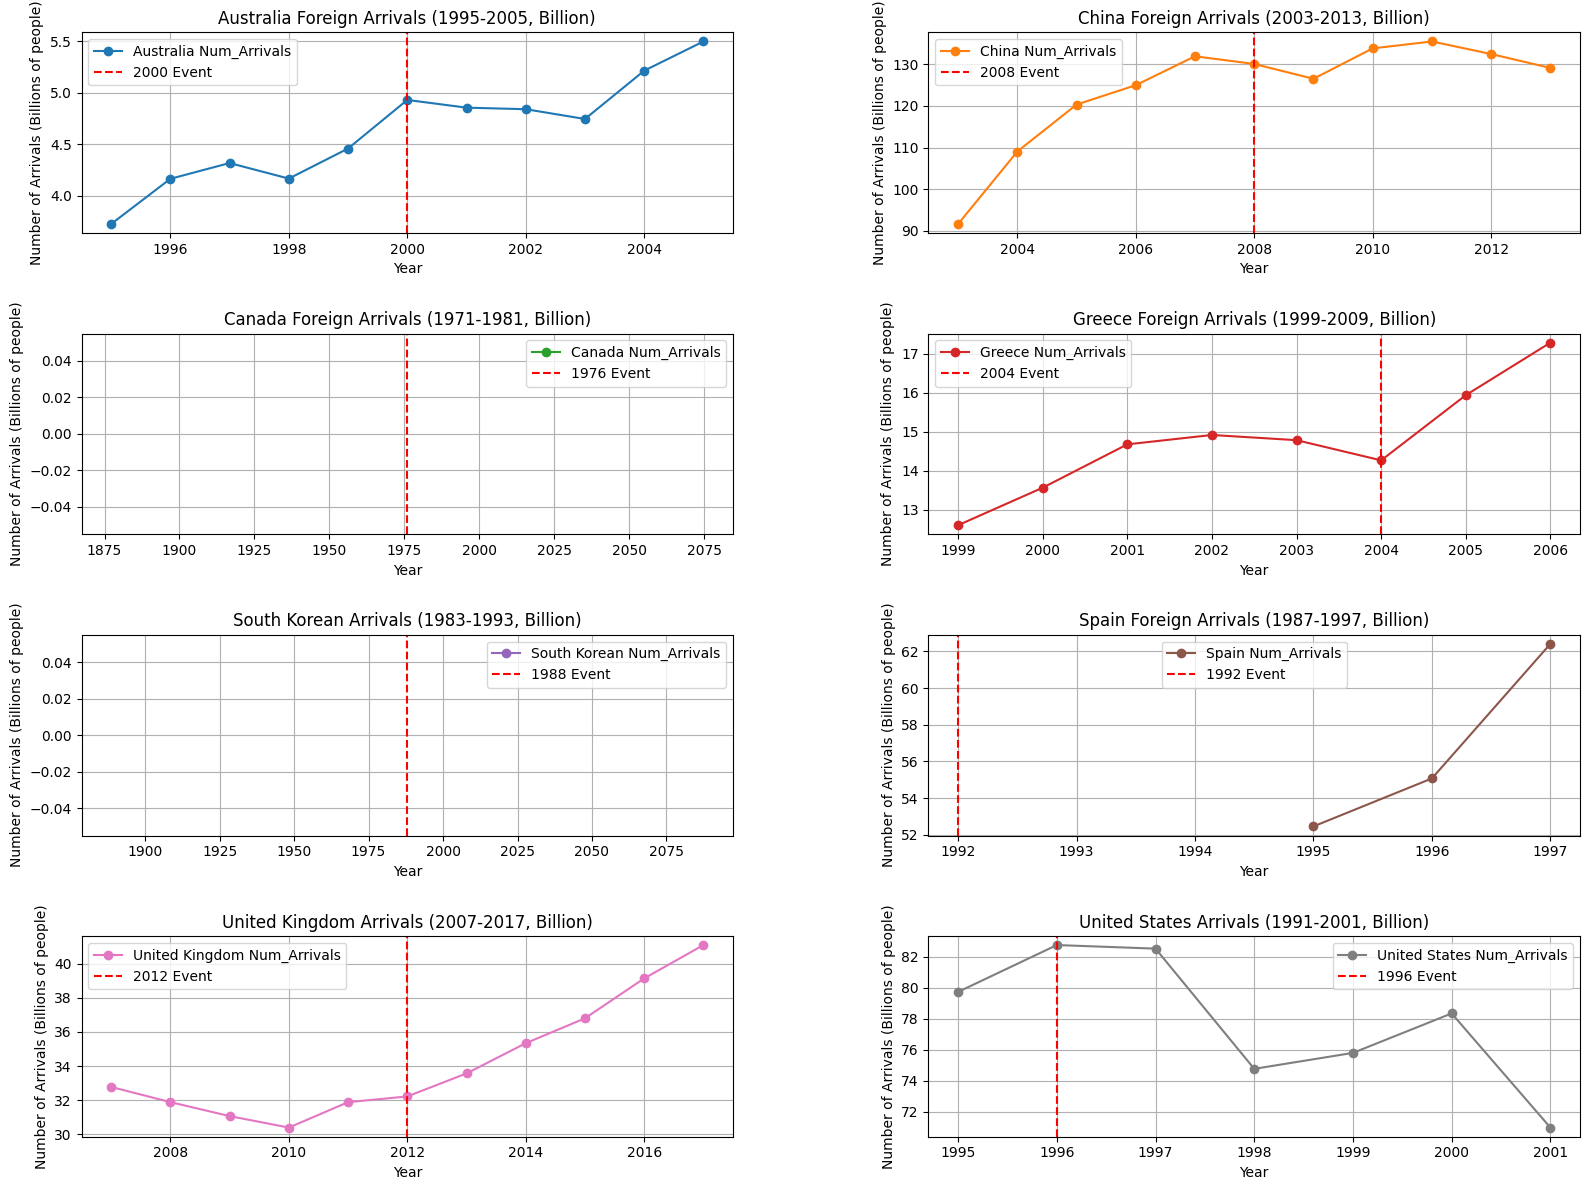

In [110]:
eight_subplots(
    dataframes=[
        cleaned_df1_tour, cleaned_df2_tour, cleaned_df3_tour, cleaned_df4_tour,
        cleaned_df5_tour, cleaned_df6_tour, cleaned_df7_tour, cleaned_df8_tour
    ],
    host_years=[2000, 2008, 1976, 2004, 1988, 1992, 2012, 1996],
    legends=[
        "Australia Num_Arrivals",
        "China Num_Arrivals",
        "Canada Num_Arrivals",
        "Greece Num_Arrivals",
        "South Korean Num_Arrivals",
        "Spain Num_Arrivals",
        "United Kingdom Num_Arrivals",
        "United States Num_Arrivals"
    ],
    titles=[
        "Australia Foreign Arrivals (1995-2005, Billion)",
        "China Foreign Arrivals (2003-2013, Billion)",
        "Canada Foreign Arrivals (1971-1981, Billion)",
        "Greece Foreign Arrivals (1999-2009, Billion)",
        "South Korean Arrivals (1983-1993, Billion)",
        "Spain Foreign Arrivals (1987-1997, Billion)",
        "United Kingdom Arrivals (2007-2017, Billion)",
        "United States Arrivals (1991-2001, Billion)"
    ],
    x_column="Year",
    y_column="Num_Arrivals",
    xlabel="Year",
    ylabel="Number of Arrivals (Billions of people)"
)


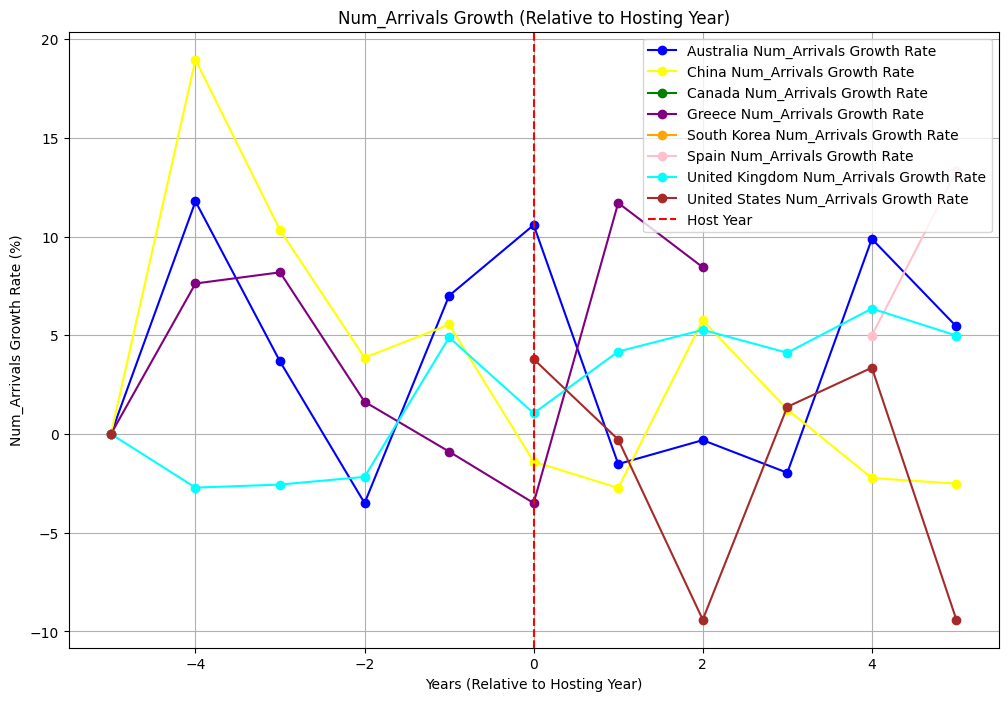

In [111]:
growth_rate_plot(
    dfs=[
        cleaned_df1_tour, cleaned_df2_tour, cleaned_df3_tour, cleaned_df4_tour,
        cleaned_df5_tour, cleaned_df6_tour, cleaned_df7_tour, cleaned_df8_tour
    ],
    countries=[
        "Australia",
        "China",
        "Canada",
        "Greece",
        "South Korea",
        "Spain",
        "United Kingdom",
        "United States"
    ],
    metric="Num_Arrivals",
    colors=None  # Default color palette
)


The figure depicts the Num_Arrivals Growth Rate relative to the hosting year across eight countries, but significant data gaps impact some observations. China (yellow line) exhibits a sharp peak at -4 years , reflecting strong pre-Olympic tourism promotion and infrastructure development; however, the growth rate declines quickly for coutries like Australia after the event, indicating unsustained benefits and limited long-term gains. 

Greece (pink line) displays a notable post-Olympic surge in growth after year 1, pointing to delayed but sustained impacts on tourism. United Kingdom (cyan line) demonstrates stable but mild increases, with no distinct Olympic-related spikes. Spain (brown line) has limited data (1995-1997), and although visible, the growth shows a brief rise around the hosting year before declining sharply.

Canada (green line) and South Korea (orange line) lack visible trends as their Olympic years (1976 and 1988) fall outside the dataset's coverage starting from 1995. The United States (red line) shows a sharp decline post-hosting year, reflecting transient benefits and potentially saturated tourism markets. 

Overall, China's significant pre-event spike contrasts with Australia's steadier but lower growth, while Greece suggests delayed positive effects. Data gaps for Canada, Korea, and incomplete records for Spain limit cross-country comparisons, emphasizing the need for expanded datasets to evaluate long-term Olympic impacts comprehensively.

## Health Metrics

* Obesity

In [112]:
AUS_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['Australia'],
    year_column='Period',
    year_range=(1995, 2005),
    skip_rows=0
)

CHI_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['China'],
    year_column='Period',
    year_range=(2003, 2013),
    skip_rows=0
)


CAN_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['Canada'],
    year_column='Period',
    year_range=(1971, 1981),
    skip_rows=0
)


GR_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['Greece'],
    year_column='Period',
    year_range=(1999, 2009),
    skip_rows=0
)


KOR_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['Republic of Korea'],
    year_column='Period',
    year_range=(1983, 1993),
    skip_rows=0
)


ES_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['Spain'],
    year_column='Period',
    year_range=(1987, 1997),
    skip_rows=0
)

UK_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['United Kingdom of Great Britain and Northern Ireland'],
    year_column='Period',
    year_range=(2007, 2017),
    skip_rows=0
)

US_obesity = preprocess_csv_type2(
    file_path='data/Prevalence_of_obesity_among_adults.csv',
    country_column='Location',
    countries=['United States of America'],
    year_column='Period',
    year_range=(1991, 2001),
    skip_rows=0
)

# Test outputs
print(AUS_obesity.head())  # Test Australia
print(CHI_obesity.head())  # Test China
print(CAN_obesity.head())  # Test Canada
print(GR_obesity.head())   # Test Greece
print(KOR_obesity.head())  # Test South Korea
print(ES_obesity.head())   # Test Spain
print(UK_obesity.head())   # Test UK
print(US_obesity.head())   # Test USA


        Location  Period        Dim1  Value
10485  Australia    2005        Male   23.5
10486  Australia    2005      Female   23.5
10487  Australia    2005  Both sexes   23.5
11074  Australia    2004        Male   22.8
11076  Australia    2004  Both sexes   22.9
     Location  Period        Dim1  Value
5842    China    2013        Male    4.6
5847    China    2013  Both sexes    4.9
5872    China    2013      Female    5.1
6436    China    2012        Male    4.3
6439    China    2012  Both sexes    4.6
Empty DataFrame
Columns: [Location, Period, Dim1, Value]
Index: []
     Location  Period        Dim1  Value
8076   Greece    2009        Male   24.5
8116   Greece    2009  Both sexes   27.0
8141   Greece    2009      Female   29.4
8672   Greece    2008        Male   23.7
8715   Greece    2008  Both sexes   26.4
                Location  Period        Dim1  Value
17380  Republic of Korea    1993        Male    1.1
17412  Republic of Korea    1993  Both sexes    1.7
17666  Republic of Ko

In [113]:
def process_heath_data(df, host_year, metric_name):
    """
    Process obesity data for each gender and calculate growth rates.
    
    :param df: DataFrame to process
    :param host_year: Year used as the reference for calculating growth rates
    :param metric_name: Metric name to calculate growth rates
    :return: Combined DataFrame with growth rates for all genders
    """
    gender_list = ['Female', 'Male', 'Both sexes']  # List of genders to process
    processed_data = []
    
    for gender in gender_list:
        processed_df = index_rename_and_calculate_growth_rate(
            df=df[df['Dim1'] == gender].copy(),
            rename_dict={'Location': 'Country', 'Period': 'Year', 'Dim1': 'Gender', 'Value': f'{metric_name}_rate'},
            host_year=host_year,
            metric_column=f'{metric_name}_rate'
        )
        processed_data.append(processed_df) 
    return pd.concat(processed_data, ignore_index=True)


In [116]:
cleaned_df1_obe = process_heath_data(
    df=AUS_obesity, 
    host_year=2000, 
    metric_name='Obesity'
)

cleaned_df2_obe = process_heath_data(
    df=CHI_obesity, 
    host_year=2008, 
    metric_name='Obesity'
)

cleaned_df3_obe = process_heath_data(
    df=CAN_obesity, 
    host_year=1976, 
    metric_name='Obesity'
)

cleaned_df4_obe = process_heath_data(
    df=GR_obesity, 
    host_year=2004, 
    metric_name='Obesity'
)

cleaned_df5_obe = process_heath_data(
    df=KOR_obesity, 
    host_year=1988, 
    metric_name='Obesity'
)

cleaned_df6_obe = process_heath_data(
    df=ES_obesity, 
    host_year=1992, 
    metric_name='Obesity'
)

cleaned_df7_obe = process_heath_data(
    df=UK_obesity, 
    host_year=2012, 
    metric_name='Obesity'
)

cleaned_df8_obe = process_heath_data(
    df=US_obesity, 
    host_year=1996, 
    metric_name='Obesity'
)



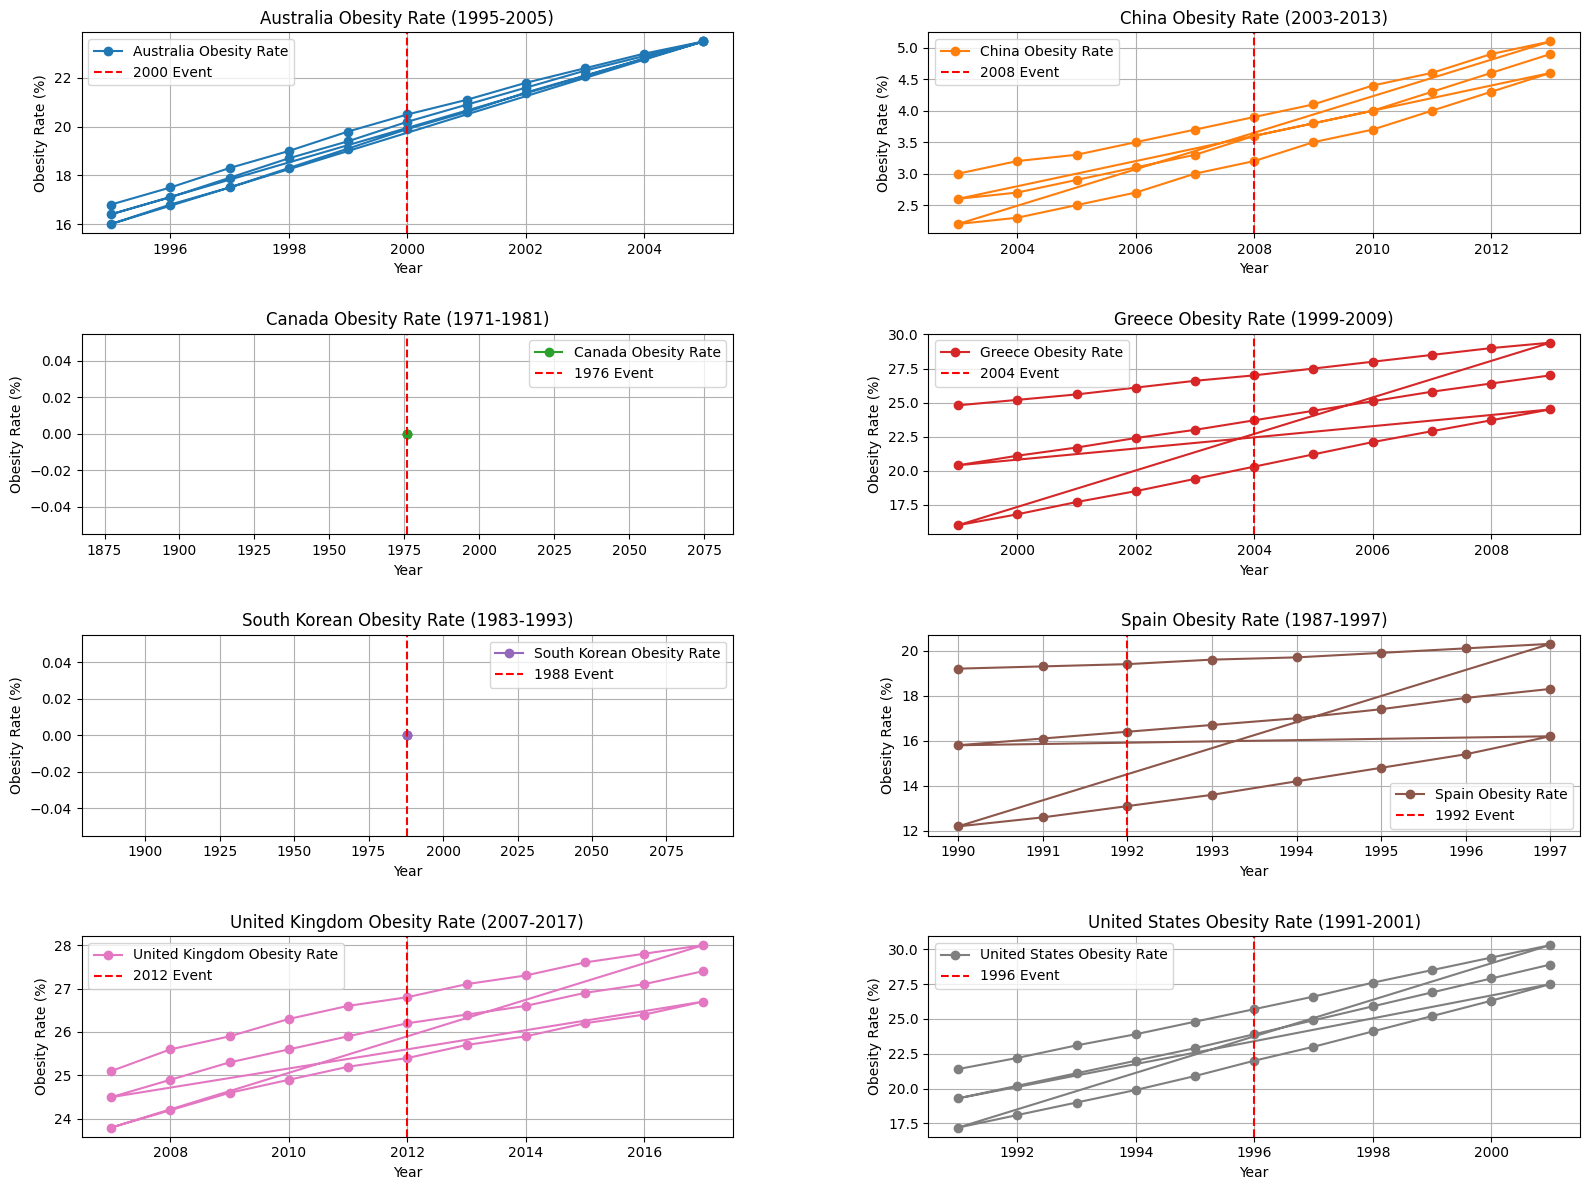

In [117]:
eight_subplots(
    dataframes=[
        cleaned_df1_obe,cleaned_df2_obe,cleaned_df3_obe,cleaned_df4_obe,
        cleaned_df5_obe,cleaned_df6_obe,cleaned_df7_obe, cleaned_df8_obe
    ],
    host_years=[2000, 2008, 1976, 2004, 1988, 1992, 2012, 1996],
    legends=[
        "Australia Obesity Rate",
        "China Obesity Rate",
        "Canada Obesity Rate",
        "Greece Obesity Rate",
        "South Korean Obesity Rate",
        "Spain Obesity Rate",
        "United Kingdom Obesity Rate",
        "United States Obesity Rate"
    ],
    titles=[
        "Australia Obesity Rate (1995-2005)",
        "China Obesity Rate (2003-2013)",
        "Canada Obesity Rate (1971-1981)",
        "Greece Obesity Rate (1999-2009)",
        "South Korean Obesity Rate (1983-1993)",
        "Spain Obesity Rate (1987-1997)",
        "United Kingdom Obesity Rate (2007-2017)",
        "United States Obesity Rate (1991-2001)"
    ],
    x_column="Year",
    y_column="Obesity_rate",
    xlabel="Year",
    ylabel="Obesity Rate (%)"
)


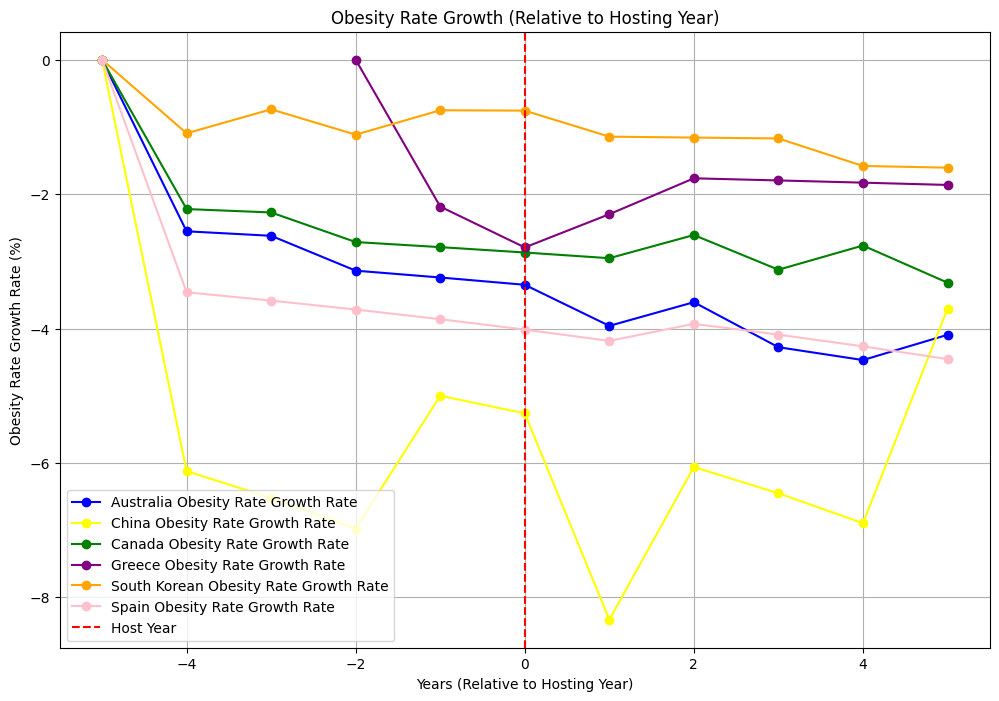

In [120]:
growth_rate_plot(
    dfs=[
        cleaned_df1_obe[cleaned_df1_obe['Gender'] == 'Both sexes'],
        cleaned_df2_obe[cleaned_df2_obe['Gender'] == 'Both sexes'],
        # cleaned_df3_obe[cleaned_df3_obe['Gender'] == 'Both sexes'],
        cleaned_df4_obe[cleaned_df4_obe['Gender'] == 'Both sexes'],
        # cleaned_df5_obe[cleaned_df5_obe['Gender'] == 'Both sexes'],
        cleaned_df6_obe[cleaned_df6_obe['Gender'] == 'Both sexes'], 
        cleaned_df7_obe[cleaned_df7_obe['Gender'] == 'Both sexes'],
        cleaned_df8_obe[cleaned_df8_obe['Gender'] == 'Both sexes'],
    ],
    countries=[
        "Australia",
        "China",
        "Canada",
        "Greece",
        "South Korean",
        "Spain",
        "United Kingdom",
        "United States"
    ],
    metric="Obesity Rate",
    colors=None  # Use default color palette
)


China saw a sharp decline in obesity growth starting 4 years before the hosting year, reaching its lowest point around year +1. However, the trend rebounded slightly in the middle term (3–5 years).
All other coutries expect Korea (partial data) showed a steady decline leading up to and after hosting, indicating more consistent and sustained improvements compared to China.

* Under Weight

In [181]:
# Preprocess underweight data for Australia
AUS_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['Australia'],
    year_column='Period',
    year_range=(1995, 2005),
    skip_rows=0
)

# Preprocess underweight data for China
CHI_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['China'],
    year_column='Period',
    year_range=(2003, 2013),
    skip_rows=0
)

# Preprocess underweight data for Canada
CAN_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['Canada'],
    year_column='Period',
    year_range=(1971, 1981),
    skip_rows=0
)

# Preprocess underweight data for Greece
GR_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['Greece'],
    year_column='Period',
    year_range=(1999, 2009),
    skip_rows=0
)

# Preprocess underweight data for South Korea
KOR_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['Republic of Korea'],
    year_column='Period',
    year_range=(1983, 1993),
    skip_rows=0
)

# Preprocess underweight data for Spain
ES_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['Spain'],
    year_column='Period',
    year_range=(1987, 1997),
    skip_rows=0
)

# Preprocess underweight data for UK
UK_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['United Kingdom of Great Britain and Northern Ireland'],
    year_column='Period',
    year_range=(2007, 2017),
    skip_rows=0
)

# Preprocess underweight data for USA
US_underweight = preprocess_csv_type2(
    file_path='data/Prevalence_of_underweight_among_adults.csv',
    country_column='Location',
    countries=['United States of America'],
    year_column='Period',
    year_range=(1991, 2001),
    skip_rows=0
)

# Test outputs
print(AUS_underweight.head())  # Test Australia
print(CHI_underweight.head())  # Test China
print(CAN_underweight.head())  # Test Canada
print(GR_underweight.head())   # Test Greece
print(KOR_underweight.head())  # Test South Korea
print(ES_underweight.head())   # Test Spain
print(UK_underweight.head())   # Test UK
print(US_underweight.head())   # Test USA


        Location  Period        Dim1  Value
10195  Australia    2005        Male    0.9
10233  Australia    2005  Both sexes    1.5
10408  Australia    2005      Female    2.0
10790  Australia    2004        Male    0.9
10830  Australia    2004  Both sexes    1.5
     Location  Period        Dim1  Value
5861    China    2013        Male    4.8
5891    China    2013  Both sexes    5.9
5922    China    2013      Female    7.1
6465    China    2012        Male    5.0
6496    China    2012  Both sexes    6.2
Empty DataFrame
Columns: [Location, Period, Dim1, Value]
Index: []
     Location  Period        Dim1  Value
7785   Greece    2009        Male    0.6
7844   Greece    2009  Both sexes    1.4
8043   Greece    2009      Female    2.2
8381   Greece    2008        Male    0.6
8446   Greece    2008  Both sexes    1.5
                Location  Period        Dim1  Value
17687  Republic of Korea    1993        Male    3.3
17783  Republic of Korea    1993  Both sexes    4.7
17836  Republic of Ko

In [182]:
# Process underweight data for 7 countries
cleaned_df1_underweight = process_heath_data(
    df=AUS_underweight,
    host_year=2000,
    metric_name='Underweight'
)

cleaned_df2_underweight = process_heath_data(
    df=CHI_underweight,
    host_year=2008,
    metric_name='Underweight'
)

cleaned_df3_underweight = process_heath_data(
    df=GR_underweight,
    host_year=2004,
    metric_name='Underweight'
)

cleaned_df4_underweight = process_heath_data(
    df=ES_underweight,
    host_year=1992,
    metric_name='Underweight'
)

cleaned_df5_underweight = process_heath_data(
    df=UK_underweight,
    host_year=2012,
    metric_name='Underweight'
)

cleaned_df6_underweight = process_heath_data(
    df=US_underweight,
    host_year=1996,
    metric_name='Underweight'
)

cleaned_df7_underweight = process_heath_data(
    df=KOR_underweight,
    host_year=1988,
    metric_name='Underweight'
)

# Test outputs
print("Australia Data:")
print(cleaned_df1_underweight.head())

print("\nChina Data:")
print(cleaned_df2_underweight.head())

print("\nGreece Data:")
print(cleaned_df3_underweight.head())

print("\nSpain Data:")
print(cleaned_df4_underweight.head())

print("\nUnited Kingdom Data:")
print(cleaned_df5_underweight.head())

print("\nUnited States Data:")
print(cleaned_df6_underweight.head())

print("\nSouth Korea Data:")
print(cleaned_df7_underweight.head())


Australia Data:
     Country  Year  Gender  Underweight_rate  Growth Rate (%)  Relative Year
0  Australia  1995  Female               2.7         0.000000             -5
1  Australia  1996  Female               2.6         5.000000             -4
2  Australia  1997  Female               2.5         0.000000             -3
3  Australia  1998  Female               2.4         0.000000             -2
4  Australia  1999  Female               2.3         4.761905             -1

China Data:
  Country  Year  Gender  Underweight_rate  Growth Rate (%)  Relative Year
0   China  2003  Female               8.7         0.000000             -5
1   China  2004  Female               8.6         4.225352             -4
2   China  2005  Female               8.5         2.702703             -3
3   China  2006  Female               8.3         1.315789             -2
4   China  2007  Female               8.2         2.597403             -1

Greece Data:
  Country  Year  Gender  Underweight_rate  Growth R

TypeError: 'NoneType' object is not subscriptable

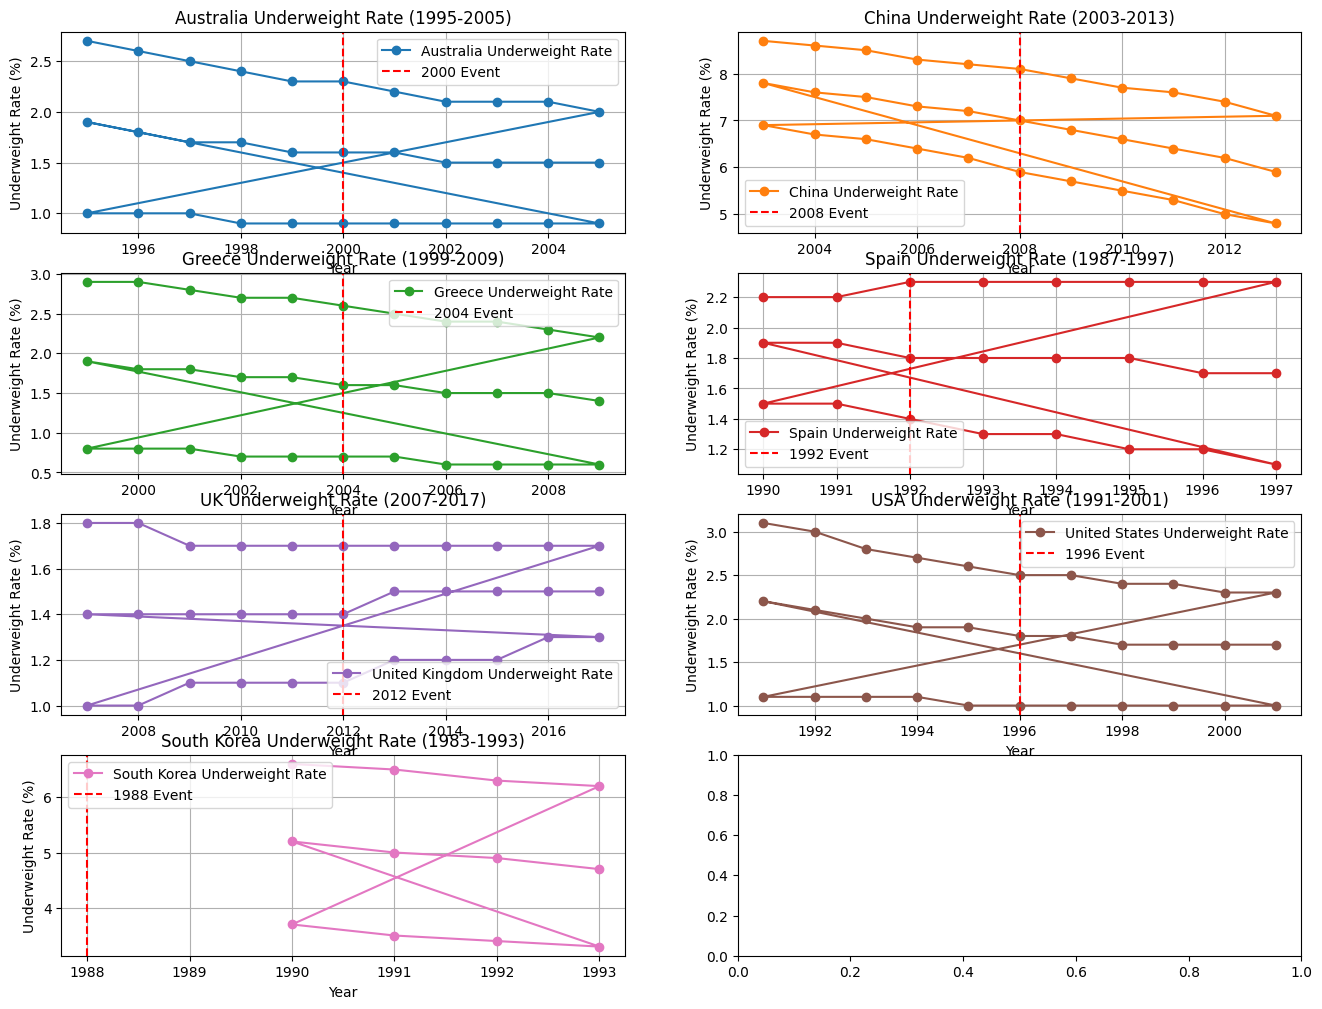

In [183]:
# Define cleaned DataFrames
cleaned_underweight_dfs = [
    cleaned_df1_underweight,  # Australia
    cleaned_df2_underweight,  # China
    cleaned_df3_underweight,  # Greece
    cleaned_df4_underweight,  # Spain
    cleaned_df5_underweight,  # United Kingdom
    cleaned_df6_underweight,  # United States
    cleaned_df7_underweight   # South Korea
]

# Host years for each country
host_years = [2000, 2008, 2004, 1992, 2012, 1996, 1988]

# Legends for the plots
legends = [
    "Australia Underweight Rate",
    "China Underweight Rate",
    "Greece Underweight Rate",
    "Spain Underweight Rate",
    "United Kingdom Underweight Rate",
    "United States Underweight Rate",
    "South Korea Underweight Rate"
]

# Titles for each subplot
titles = [
    "Australia Underweight Rate (1995-2005)",
    "China Underweight Rate (2003-2013)",
    "Greece Underweight Rate (1999-2009)",
    "Spain Underweight Rate (1987-1997)",
    "UK Underweight Rate (2007-2017)",
    "USA Underweight Rate (1991-2001)",
    "South Korea Underweight Rate (1983-1993)"
]

# Plot the subplots
eight_subplots(
    dataframes=cleaned_underweight_dfs + [None],  # Add None for the 8th slot
    host_years=host_years + [None],  # Add None for the 8th slot
    legends=legends + ["No Data"],  # Add placeholder legend
    titles=titles + ["No Data"],  # Add placeholder title
    x_column="Year",
    y_column="Underweight_rate",
    xlabel="Year",
    ylabel="Underweight Rate (%)"
)


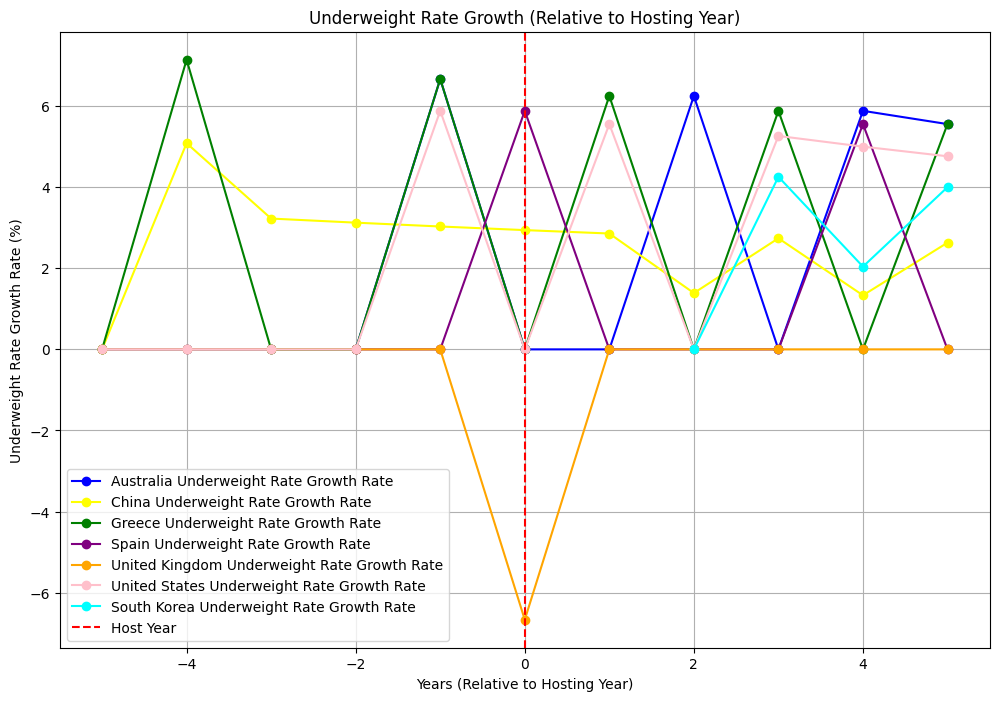

In [184]:
growth_rate_plot(
    dfs=[
        cleaned_df1_underweight[cleaned_df1_underweight['Gender'] == 'Both sexes'],  # Australia
        cleaned_df2_underweight[cleaned_df2_underweight['Gender'] == 'Both sexes'],  # China
        cleaned_df3_underweight[cleaned_df3_underweight['Gender'] == 'Both sexes'],  # Greece
        cleaned_df4_underweight[cleaned_df4_underweight['Gender'] == 'Both sexes'],  # Spain
        cleaned_df5_underweight[cleaned_df5_underweight['Gender'] == 'Both sexes'],  # United Kingdom
        cleaned_df6_underweight[cleaned_df6_underweight['Gender'] == 'Both sexes'],  # United States
        cleaned_df7_underweight[cleaned_df7_underweight['Gender'] == 'Both sexes']   # South Korea
    ],
    countries=[
        "Australia",
        "China",
        "Greece",
        "Spain",
        "United Kingdom",
        "United States",
        "South Korea"
    ],
    metric="Underweight Rate",
    colors=None  # Use default Matplotlib color cycle
)



The graph for underweight rate growth appears highly irregular and inconsistent, with sharp spikes and drops across all countries. This unusual pattern is likely due to data quality issues, such as missing values, data sparsity, or irregular reporting.

China shows a more stable trend compared to others, the underweight rates decline steadily during the period and has ups and downs 2 year after hosting.

## Environment Indicators

* Greenhouse Gas Emission

In [56]:
AUS_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['Australia'],
    year_column='Year',
    year_range=(1995, 2005)
)

ES_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['Spain'],
    year_column='Year',
    year_range=(1987, 1997)
)

UK_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['United Kingdom'],
    year_column='Year',
    year_range=(2007, 2017)
)

CHI_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['China'],
    year_column='Year',
    year_range=(2003, 2013)
)

CAN_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['Canada'],
    year_column='Year',
    year_range=(1971, 1981)
)

GR_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['Greece'],
    year_column='Year',
    year_range=(1999, 2009)
)

KOR_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['South Korea'],
    year_column='Year',
    year_range=(1983, 1993)
)


US_GHG_emission = preprocess_csv_type3(
    file_path='data/ghg-emissions.csv',
    country_column='Country/Region',
    countries=['United States'],
    year_column='Year',
    year_range=(1991, 2001)
)


# Test outputs
print(AUS_GHG_emission.head())  
print(CHI_GHG_emission.head())
print(CAN_GHG_emission.head())
print(GR_GHG_emission.head())   
print(KOR_GHG_emission.head())
print(ES_GHG_emission.head())
print(UK_GHG_emission.head())
print(US_GHG_emission.head())


  Country/Region  Year   Value
5      Australia  1995  571.19
6      Australia  1996  571.01
7      Australia  1997  582.28
8      Australia  1998  608.08
9      Australia  1999   643.6
   Country/Region  Year    Value
13          China  2003  5386.89
14          China  2004  6135.95
15          China  2005  6862.81
16          China  2006  7547.54
17          China  2007  8165.43
Empty DataFrame
Columns: [Country/Region, Year, Value]
Index: []
   Country/Region  Year   Value
9          Greece  1999  111.37
10         Greece  2000  117.05
11         Greece  2001  117.43
12         Greece  2002  117.81
13         Greece  2003  121.13
  Country/Region  Year   Value
0    South Korea  1990  244.25
1    South Korea  1991  269.59
2    South Korea  1992  294.15
3    South Korea  1993  325.01
  Country/Region  Year   Value
0          Spain  1990  232.63
1          Spain  1991  238.82
2          Spain  1992  248.65
3          Spain  1993  233.85
4          Spain  1994  246.79
    Country/Region

In [57]:
cleaned_df1_GHG = index_rename_and_calculate_growth_rate(
    df=AUS_GHG_emission,
    rename_dict={'Value':'MtCO2e'},
    host_year=2000,
    metric_column='MtCO2e')

cleaned_df2_GHG = index_rename_and_calculate_growth_rate(
    df=CHI_GHG_emission,
    rename_dict={'Value':'MtCO2e'},
    host_year=2008,
    metric_column='MtCO2e')

cleaned_df3_GHG = index_rename_and_calculate_growth_rate(
    df=CAN_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=1976,
    metric_column='MtCO2e')

cleaned_df4_GHG = index_rename_and_calculate_growth_rate(
    df=GR_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=2004,
    metric_column='MtCO2e')

cleaned_df5_GHG = index_rename_and_calculate_growth_rate(
    df=KOR_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=1988,
    metric_column='MtCO2e')

cleaned_df6_GHG = index_rename_and_calculate_growth_rate(
    df=ES_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=1992,
    metric_column='MtCO2e')

cleaned_df7_GHG = index_rename_and_calculate_growth_rate(
    df=UK_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=2012,
    metric_column='MtCO2e')

cleaned_df8_GHG = index_rename_and_calculate_growth_rate(
    df=US_GHG_emission,
    rename_dict={'Value': 'MtCO2e'},
    host_year=1996,
    metric_column='MtCO2e')


IndexError: list index out of range

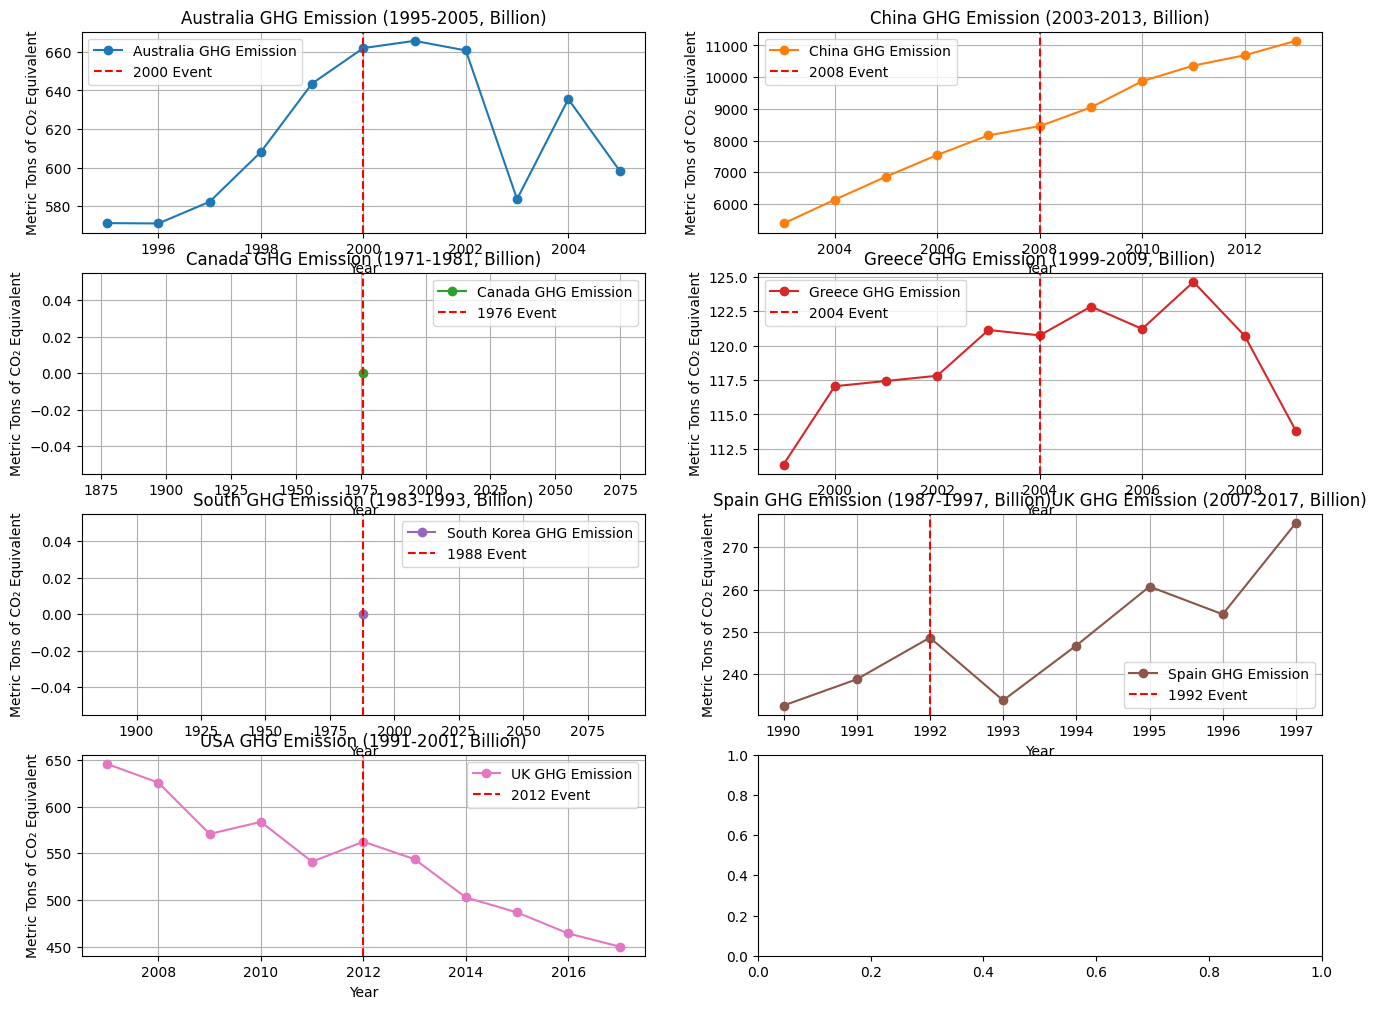

In [58]:
eight_subplots(
    dataframes=[
        cleaned_df1_GHG, cleaned_df2_GHG, cleaned_df3_GHG, cleaned_df4_GHG,
        cleaned_df5_GHG, cleaned_df6_GHG, cleaned_df7_GHG, cleaned_df8_GHG
    ],
    host_years=[2000, 2008, 1976, 2004, 1988, 1992, 2012, 1996],
    legends=[
        "Australia GHG Emission",
        "China GHG Emission",
        "Canada GHG Emission",
        "Greece GHG Emission",
        "South Korea GHG Emission",
        "Spain GHG Emission",
        "UK GHG Emission",
        "USA GHG Emission"
    ],
    titles=[
        "Australia GHG Emission (1995-2005, Billion)",
        "China GHG Emission (2003-2013, Billion)",
        "Canada GHG Emission (1971-1981, Billion)",
        "Greece GHG Emission (1999-2009, Billion)",
        "South GHG Emission (1983-1993, Billion)",
        "Spain GHG Emission (1987-1997, Billion)"
        "UK GHG Emission (2007-2017, Billion)",
        "USA GHG Emission (1991-2001, Billion)"
    ],
    x_column="Year",
    y_column="MtCO2e",
    xlabel="Year",
    ylabel="Metric Tons of CO₂ Equivalent"
)


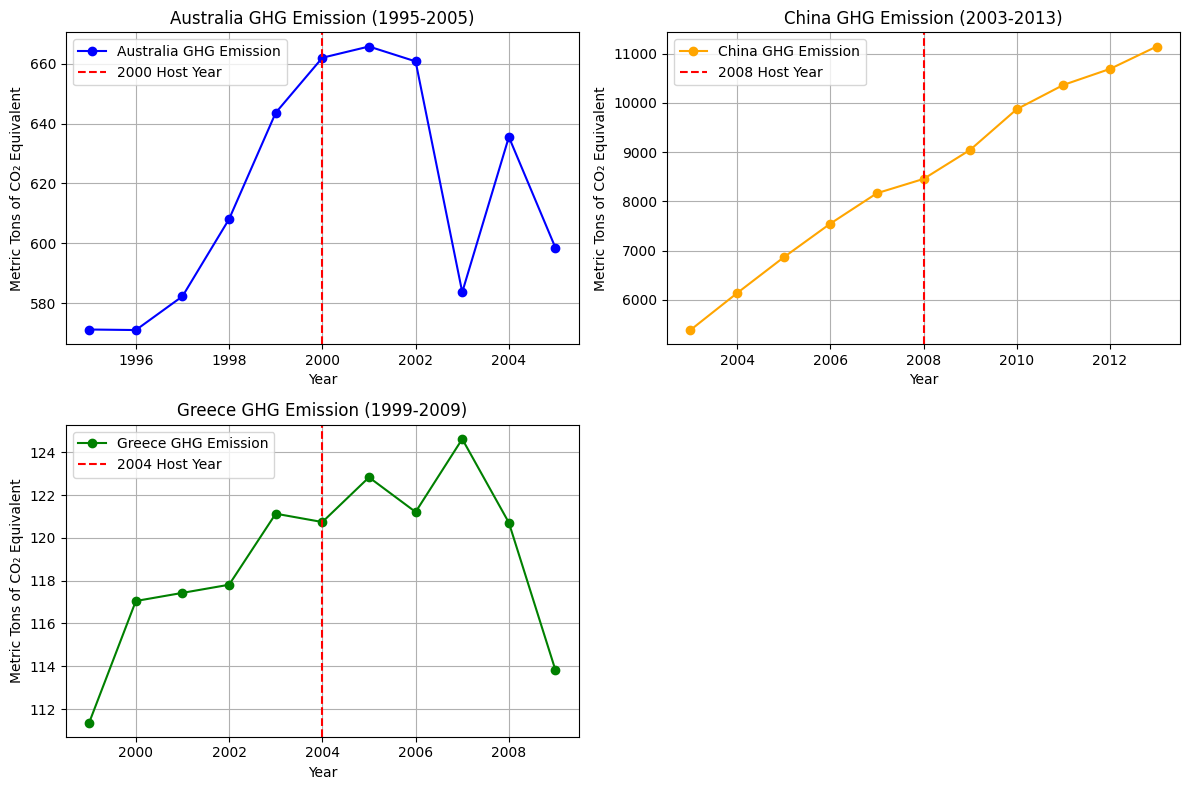

In [99]:
from matplotlib import pyplot as plt


def multi_plot_GHG(
        dfs, host_years, legends, titles,
        x_column, y_column, xlabel, ylabel, rows=2, cols=2):
    """
    Create subplots for GHG emissions trends across multiple countries.

    :param dfs: List of DataFrames for each country.
    :param host_years: List of host years for the countries.
    :param legends: List of legends for each subplot.
    :param titles: List of titles for each subplot.
    :param x_column: Column name for the x-axis.
    :param y_column: Column name for the y-axis.
    :param xlabel: Label for the x-axis.
    :param ylabel: Label for the y-axis.
    :param rows: Number of rows in the subplot grid.
    :param cols: Number of columns in the subplot grid.
    """
    plt.figure(figsize=(12, 8))

    for i, (df, host_year, legend, title) in enumerate(zip(dfs, host_years, legends, titles), 1):
        plt.subplot(rows, cols, i)
        plt.plot(
            df[x_column],
            df[y_column],
            label=legend,
            marker='o',
            color='blue' if i == 1 else 'orange' if i == 2 else 'green'
        )
        plt.axvline(x=host_year, color='red', linestyle='--', label=f'{host_year} Host Year')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

multi_plot_GHG(
    dfs=[
        cleaned_df1_GHG,  # Australia
        cleaned_df2_GHG,  # China
        cleaned_df3_GHG   # Greece
    ],
    host_years=[2000, 2008, 2004],
    legends=[
        "Australia GHG Emission",
        "China GHG Emission",
        "Greece GHG Emission"
    ],
    titles=[
        "Australia GHG Emission (1995-2005)",
        "China GHG Emission (2003-2013)",
        "Greece GHG Emission (1999-2009)"
    ],
    x_column="Year",
    y_column="MtCO2e",
    xlabel="Year",
    ylabel="Metric Tons of CO₂ Equivalent",
    rows=2,  # Two rows
    cols=2   # Two columns
)


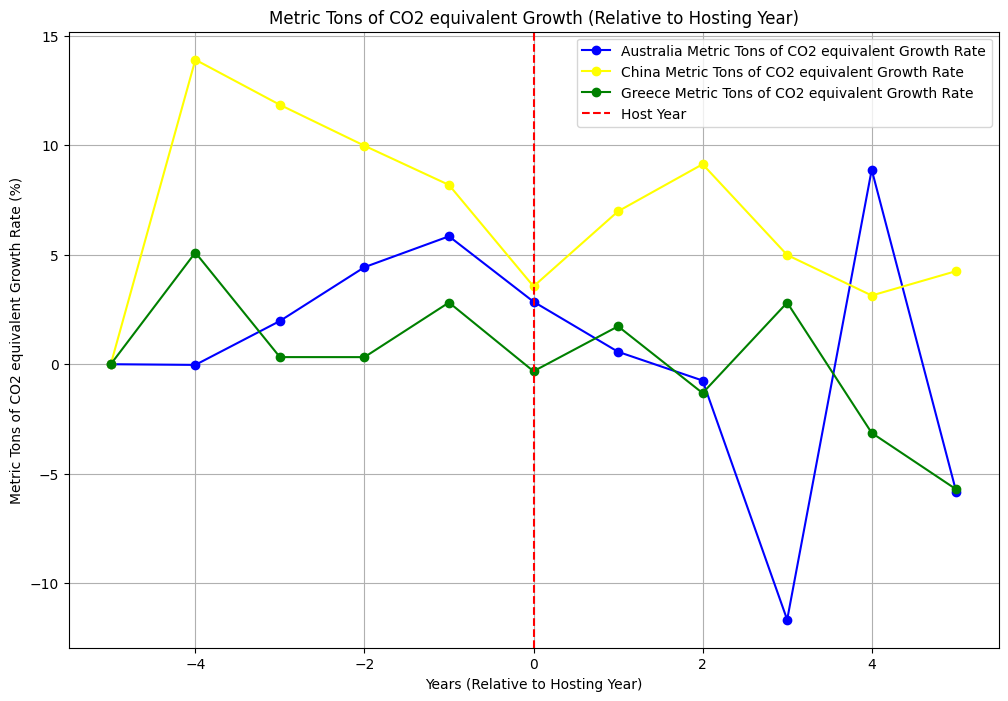

In [100]:
growth_rate_plot(
    dfs=[
        cleaned_df1_GHG,  # Australia
        cleaned_df2_GHG,  # China
        cleaned_df3_GHG   # Greece
    ],
    countries=[
        "Australia",
        "China",
        "Greece"
    ],
    metric="Metric Tons of CO2 equivalent",
    colors=None  # Use default Matplotlib color cycle
)


China shows a sharp spike in emissions growth 4 years before the hosting year, followed by a gradual decline during and after the event.

## Labor Market

In [189]:
AUS_UR = preprocess_csv_type3(
        file_path='data/Unemployment_rate.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=4
    )


CHI_UR = preprocess_special_csv(
        file_path='data/Unemployment_rate_China.csv',
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=2
    )

CAN_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['Canada'],
    year_column='Year',
    year_range=(1971, 1981),
    skip_rows=4
)


GR_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['Greece'],
    year_column='Year',
    year_range=(1999, 2009),
    skip_rows=4
)

ES_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['Spain'],
    year_column='Year',
    year_range=(1987, 1997),
    skip_rows=4
)

UK_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['United Kingdom'],
    year_column='Year',
    year_range=(2007, 2017),
    skip_rows=4
)

US_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['United States'],
    year_column='Year',
    year_range=(1991, 2001),
    skip_rows=4
)

KOR_UR = preprocess_csv_type3(
    file_path='data/Unemployment_rate.csv',
    country_column='Country Name',
    countries=['Korea, Rep.'],
    year_column='Year',
    year_range=(1983, 1993),
    skip_rows=4
)

print(AUS_UR.head())
print(CHI_UR.head())
print(CAN_UR.head())  
print(GR_UR.head())   
print(ES_UR.head())
print(UK_UR.head())
print(US_UR.head())
print(KOR_UR.head())

   Country Name  Year  Value
35    Australia  1995  8.473
36    Australia  1996  8.509
37    Australia  1997  8.367
38    Australia  1998  7.684
39    Australia  1999  6.876
                             Indicator  Year  Value
4   Unemployment Rate in Urban Area(%)  2003    4.1
7   Unemployment Rate in Urban Area(%)  2004    4.1
10  Unemployment Rate in Urban Area(%)  2005    4.1
13  Unemployment Rate in Urban Area(%)  2006    4.1
16  Unemployment Rate in Urban Area(%)  2007    4.1
   Country Name  Year  Value
11       Canada  1971    NaN
12       Canada  1972    NaN
13       Canada  1973    NaN
14       Canada  1974    NaN
15       Canada  1975    NaN
   Country Name  Year   Value
39       Greece  1999  12.138
40       Greece  2000  11.345
41       Greece  2001  10.764
42       Greece  2002  10.346
43       Greece  2003   9.839
   Country Name  Year   Value
27        Spain  1987     NaN
28        Spain  1988     NaN
29        Spain  1989     NaN
30        Spain  1990     NaN
31        

TypeError: 'NoneType' object is not subscriptable

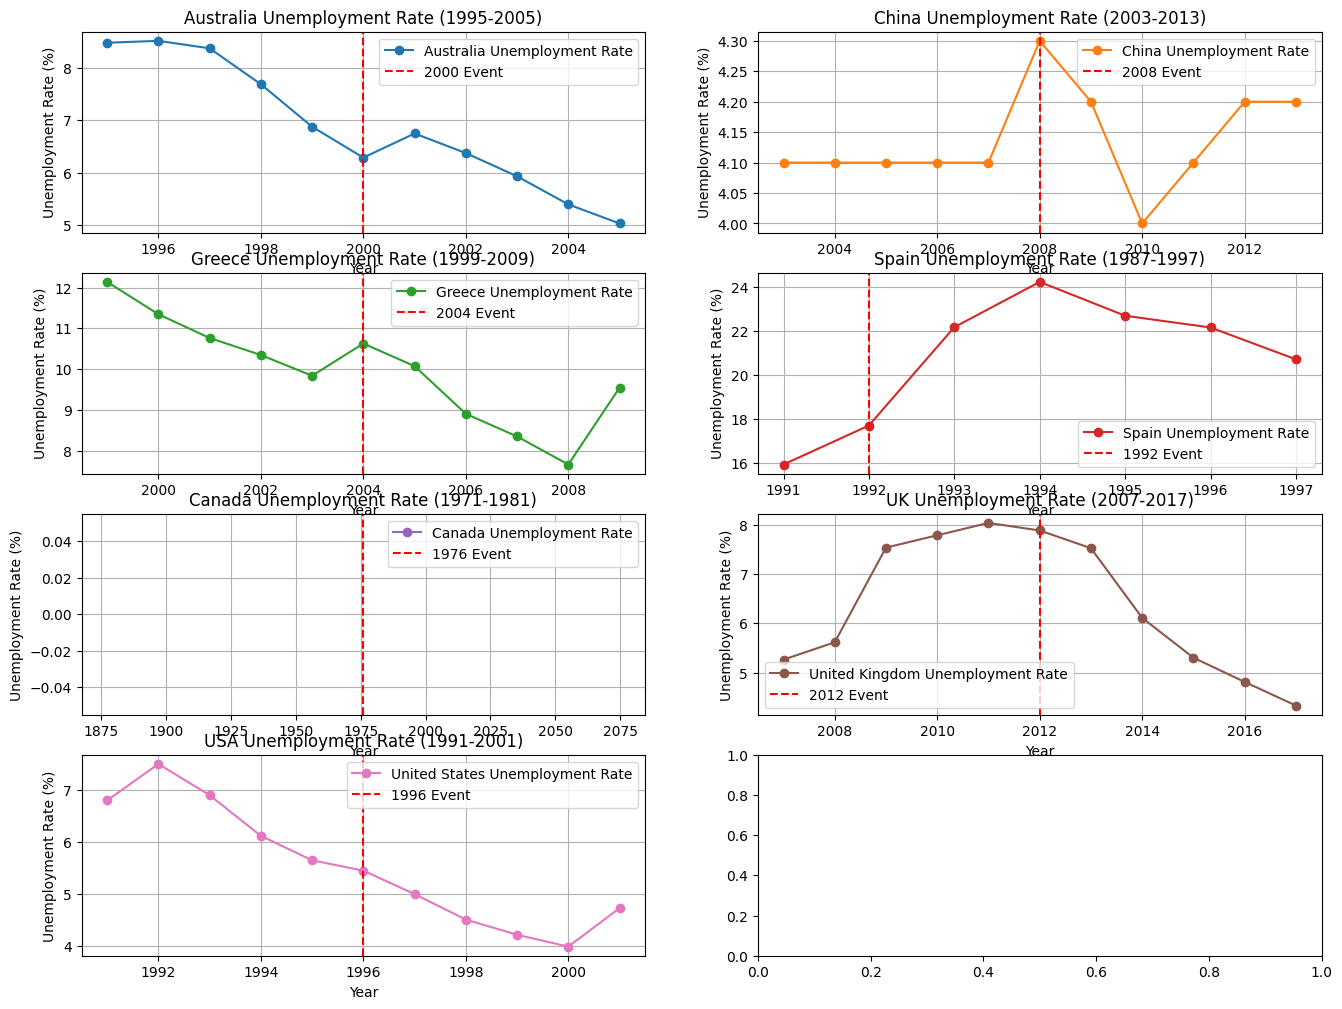

In [193]:
cleaned_df1_UR = index_rename_and_calculate_growth_rate(
    df=AUS_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2000,
    metric_column='Unemployment_Rate(%)')

cleaned_df2_UR = index_rename_and_calculate_growth_rate(
    df=CHI_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2008,
    metric_column='Unemployment_Rate(%)')

cleaned_df3_UR = index_rename_and_calculate_growth_rate(
    df=GR_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2004,
    metric_column='Unemployment_Rate(%)')

cleaned_df4_UR = index_rename_and_calculate_growth_rate(
    df=ES_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=1992,
    metric_column='Unemployment_Rate(%)')

cleaned_df5_UR = index_rename_and_calculate_growth_rate(
    df=CAN_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=1976,
    metric_column='Unemployment_Rate(%)')

cleaned_df6_UR = index_rename_and_calculate_growth_rate(
    df=UK_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2012,
    metric_column='Unemployment_Rate(%)')

cleaned_df7_UR = index_rename_and_calculate_growth_rate(
    df=US_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=1996,
    metric_column='Unemployment_Rate(%)')

# Define the list of cleaned DataFrames
cleaned_UR_dfs = [
    cleaned_df1_UR,  # Australia
    cleaned_df2_UR,  # China
    cleaned_df3_UR,  # Greece
    cleaned_df4_UR,  # Spain
    cleaned_df5_UR,  # Canada
    cleaned_df6_UR,  # United Kingdom
    cleaned_df7_UR   # United States
]

# Host years for each country
host_years = [2000, 2008, 2004, 1992, 1976, 2012, 1996]

# Legends for the plots
legends = [
    "Australia Unemployment Rate",
    "China Unemployment Rate",
    "Greece Unemployment Rate",
    "Spain Unemployment Rate",
    "Canada Unemployment Rate",
    "United Kingdom Unemployment Rate",
    "United States Unemployment Rate"
]

# Titles for each subplot
titles = [
    "Australia Unemployment Rate (1995-2005)",
    "China Unemployment Rate (2003-2013)",
    "Greece Unemployment Rate (1999-2009)",
    "Spain Unemployment Rate (1987-1997)",
    "Canada Unemployment Rate (1971-1981)",
    "UK Unemployment Rate (2007-2017)",
    "USA Unemployment Rate (1991-2001)"
]

# Use eight_subplots with 7 datasets and leave one empty
eight_subplots(
    dataframes=cleaned_UR_dfs + [None],  # Add None for the 8th slot
    host_years=host_years + [None],      # Add None for the 8th slot
    legends=legends + ["No Data"],       # Placeholder legend
    titles=titles + ["No Data"],         # Placeholder title
    x_column="Year",
    y_column="Unemployment_Rate(%)",
    xlabel="Year",
    ylabel="Unemployment Rate (%)"
)



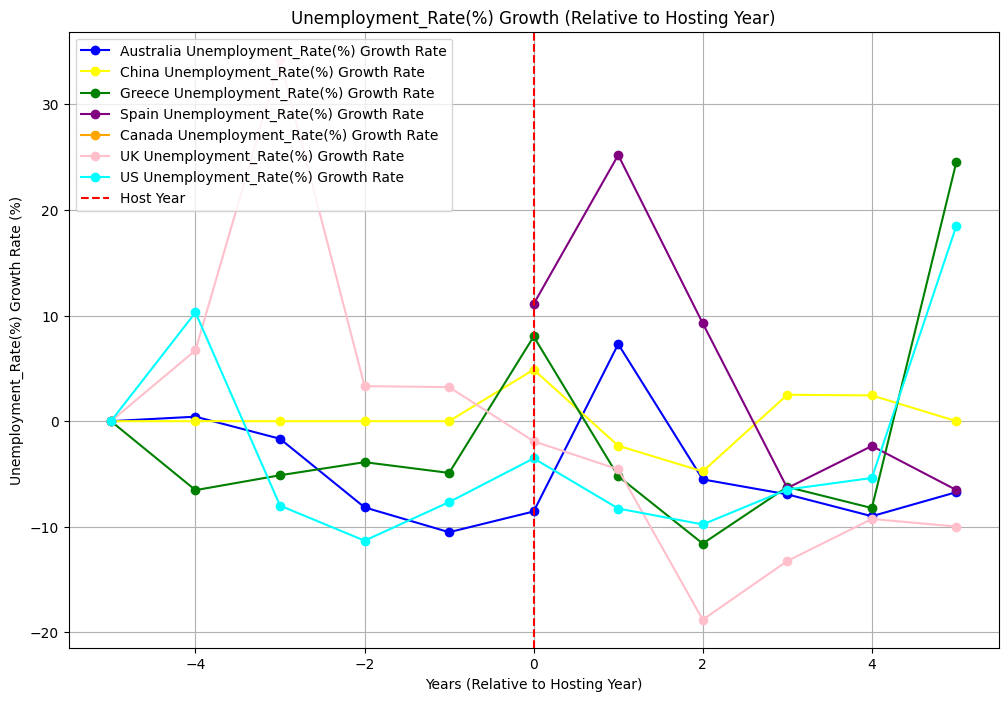

In [192]:
growth_rate_plot(
    dfs=[
        cleaned_df1_UR,  # Australia
        cleaned_df2_UR,  # China
        cleaned_df3_UR,  # Greece
        cleaned_df4_UR,  # Spain
        cleaned_df5_UR,  # Canada
        cleaned_df6_UR,  # UK
        cleaned_df7_UR   # US
    ],
    countries=[
        "Australia",
        "China",
        "Greece",
        "Spain",
        "Canada",
        "UK",
        "US"
    ],
    metric="Unemployment_Rate(%)",
    colors=None  # Default Matplotlib color cycle
)


Australia ,Spain and Greece experienced sharp increase in unemployment rate right after the hosting year and then all have a trend of decline again. Meanwhile China appeears to have a more steady fluctuation during the period. 4 years after hosting, Greece and US experienced a incline of unemployment rate but this seems like no causation between the change and the Olympics.

Overall, the data supports short-term unemployment benefits from prepare hosting the Olympics, particularly for countries like UK and US. However, the sharp rebounds in Greece and Australia underscore challenges in sustaining these employment gains post-event.

Temporal Analysis for Unemployment rate

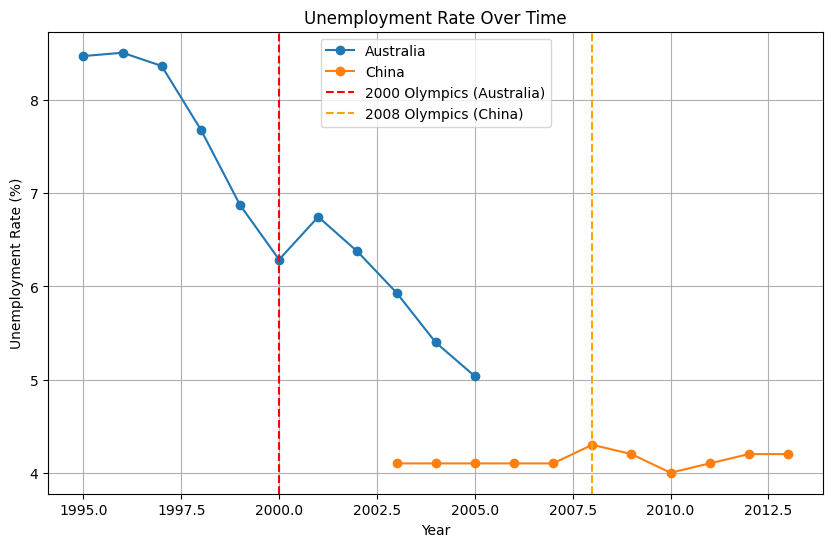

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df1_UR['Year'], cleaned_df1_UR['Unemployment_Rate(%)'], label='Australia', marker='o')
plt.plot(cleaned_df2_UR['Year'], cleaned_df2_UR['Unemployment_Rate(%)'], label='China', marker='o')
plt.axvline(x=2000, color='red', linestyle='--', label='2000 Olympics (Australia)')
plt.axvline(x=2008, color='orange', linestyle='--', label='2008 Olympics (China)')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid()
plt.show()


In [135]:
before_event = cleaned_df1_UR[cleaned_df1_UR['Year'] < 2000]
after_event = cleaned_df1_UR[cleaned_df1_UR['Year'] >= 2000]
print("Event Impact (Australia):")
print("Before 2000 Avg:", before_event['Unemployment_Rate(%)'].mean())
print("After 2000 Avg:", after_event['Unemployment_Rate(%)'].mean())


Event Impact (Australia):
Before 2000 Avg: 7.9818
After 2000 Avg: 5.963


## Metrics like GDP, FDI, and unemployment often influence each other. Therefore, we further explore correlations between metrics for each country before and after the Olympics. We also include specific combinations of metrics and allow users to select. Visualization is done using scatterplots or heatmaps. (Take Australia and China as a pair of example.

1. Within Group Analysis

merge 8*2=16 csv into 1 dataframe for analysis

In [126]:
cleaned_df1_FDI = index_rename_and_calculate_growth_rate(
    df=AUS_FDI,
    rename_dict=None,
    host_year=2000,
    metric_column='FDI')

cleaned_df2_FDI = index_rename_and_calculate_growth_rate(
    df=CHI_FDI,
    rename_dict=None,
    host_year=2008,
    metric_column='FDI')
metrics = {
    "GDP_per_capita": {"AUS": cleaned_df1_gdp, "CHI": cleaned_df2_gdp},
    "FDI": {"AUS": cleaned_df1_FDI, "CHI": cleaned_df2_FDI},
    "Gov_Consumption": {"AUS": cleaned_df1_gov_consume, "CHI": cleaned_df2_gov_consume},
    "Num_Arrivals": {"AUS": cleaned_df1_tour, "CHI": cleaned_df2_tour},
    "Obesity_rate": {"AUS": cleaned_df1_obe[cleaned_df1_obe['Gender'] == 'Both sexes'], 
                     "CHI": cleaned_df2_obe[cleaned_df2_obe['Gender'] == 'Both sexes']},
    "Underweight_rate": {"AUS": cleaned_df1_underweight[cleaned_df1_underweight['Gender'] == 'Both sexes'], 
                         "CHI": cleaned_df2_underweight[cleaned_df2_underweight['Gender'] == 'Both sexes']},
    "MtCO2e": {"AUS": cleaned_df1_GHG, "CHI": cleaned_df2_GHG},
    "Unemployment_Rate(%)": {"AUS": cleaned_df1_UR, "CHI": cleaned_df2_UR}
}


merged_data = load_and_merge_data(metrics)
print(merged_data.head())

   Relative Year  GDP_per_capita_AUS  GDP_per_capita_CHI    FDI_AUS  \
0             -5          20448.1220           1288.6375  13.268875   
1             -4          22021.7839           1508.6679   4.563952   
2             -3          23646.6230           1753.4142   8.088069   
3             -2          21479.1142           2099.2194   7.597611   
4             -1          20712.6698           2693.9587   2.210918   

      FDI_CHI  Gov_Consumption_AUS  Gov_Consumption_CHI  Num_Arrivals_AUS  \
0   57.900937            68.630829           254.258838             3.726   
1   68.117272            74.587956           285.976158             4.165   
2  104.108694            79.594491           338.268817             4.318   
3  124.082036            72.989894           407.878185             4.167   
4  156.249335            72.984710           519.297995             4.459   

   Num_Arrivals_CHI  Obesity_rate_AUS  Obesity_rate_CHI  Underweight_rate_AUS  \
0            91.662          

Split 8 metrics into 3 groups: economic, social, employment

Numerical Analysis: compute correlation matrix for every group and every country

In [127]:
correlation_matrices = compute_country_correlation_matrices(merged_data, metric_groups, country_suffix)

# Access Australia's and China's correlations
aus_corr = correlation_matrices["Australia"]
chi_corr = correlation_matrices["China"]



Computing correlation matrices for Australia:

Economic Correlation Matrix for Australia:
                     GDP_per_capita_AUS   FDI_AUS  Gov_Consumption_AUS
GDP_per_capita_AUS             1.000000 -0.194408             0.993077
FDI_AUS                       -0.194408  1.000000            -0.193891
Gov_Consumption_AUS            0.993077 -0.193891             1.000000

Social Correlation Matrix for Australia:
                          Num_Arrivals_AUS  Obesity_rate_AUS  \
Num_Arrivals_AUS                  1.000000          0.936591   
Obesity_rate_AUS                  0.936591          1.000000   
Underweight_rate_AUS             -0.889052         -0.947868   
Unemployment_Rate(%)_AUS         -0.931200         -0.971785   

                          Underweight_rate_AUS  Unemployment_Rate(%)_AUS  
Num_Arrivals_AUS                     -0.889052                 -0.931200  
Obesity_rate_AUS                     -0.947868                 -0.971785  
Underweight_rate_AUS                 

Numerical Analysis: What are the max & min correlation values within every matrix? Does it differ across countries?

In [128]:
# Step 1: Organize correlation matrices dynamically
country_matrices = {}

for country, suffix in country_suffix.items():
    country_matrices[country] = {}
    for group, metrics in metric_groups.items():
        group_columns = [f"{metric}{suffix}" for metric in metrics if f"{metric}{suffix}" in merged_data.columns]
        if len(group_columns) > 1:
            group_corr = calculate_correlation(merged_data, group_columns, time_period=(-5, 5))
            country_matrices[country][group] = group_corr

# Step 2: Highlight key correlations dynamically for all countries and groups
for country, matrices in country_matrices.items():
    highlight_key_correlations_all_matrices(matrices, country)



=== Highlighting Key Correlations for Australia ===

Economic Correlation Matrix:
  Strongest correlation: ('GDP_per_capita_AUS', 'Gov_Consumption_AUS') = 0.99
  Weakest correlation: ('GDP_per_capita_AUS', 'FDI_AUS') = -0.19

Social Correlation Matrix:
  Strongest correlation: ('Num_Arrivals_AUS', 'Obesity_rate_AUS') = 0.94
  Weakest correlation: ('Obesity_rate_AUS', 'Unemployment_Rate(%)_AUS') = -0.97

=== Highlighting Key Correlations for China ===

Economic Correlation Matrix:
  Strongest correlation: ('GDP_per_capita_CHI', 'Gov_Consumption_CHI') = 1.00
  Weakest correlation: ('FDI_CHI', 'Gov_Consumption_CHI') = 0.93

Social Correlation Matrix:
  Strongest correlation: ('Num_Arrivals_CHI', 'Obesity_rate_CHI') = 0.72
  Weakest correlation: ('Obesity_rate_CHI', 'Underweight_rate_CHI') = -1.00


For economic correlation, both Australia and China see the strongest correlation between GDP and Gov. consumption. However, the weakest correlation differs between them. GDP and FDI is most weakly correlated for Australia, while FDI and Gov. consumption is most weakly correlated for China. 

As to social correlations, Australia finds the strongest relationship between tourism and Obesity rate, and weakest relationship between Obesity rate and Unemployment rate. However, China finds the strongest relationship between Obesity rate and Underweight rate, and the weakest relationship between tourism and unemployment rate.

Visualization Analysis: create a heatmap to capture correlation strength within every group for both countries

Generating heatmaps for Australia:


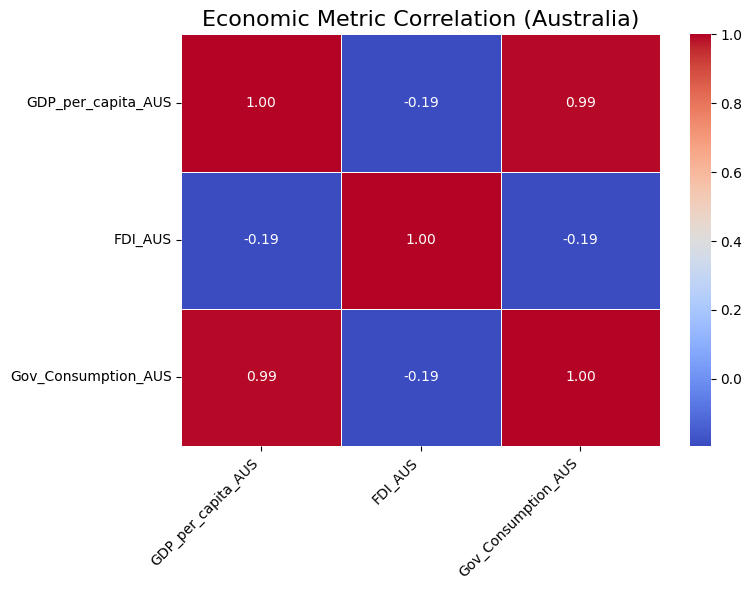

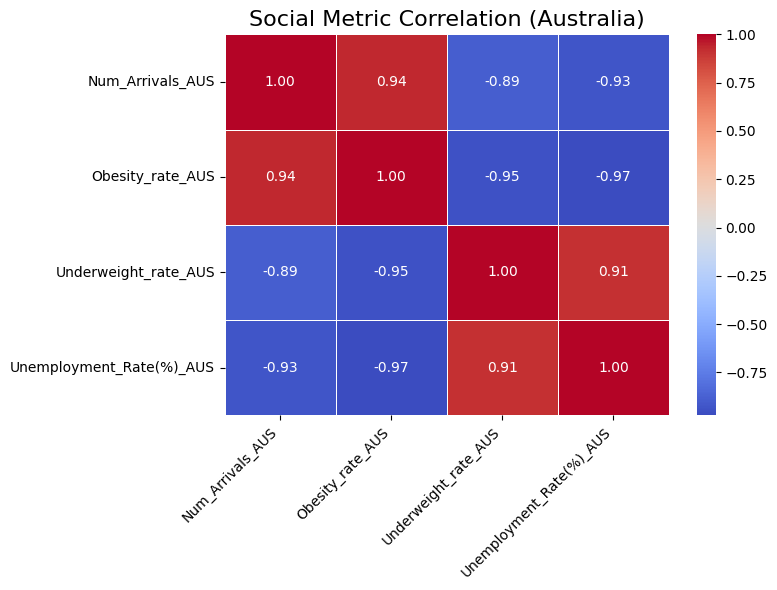

Generating heatmaps for China:


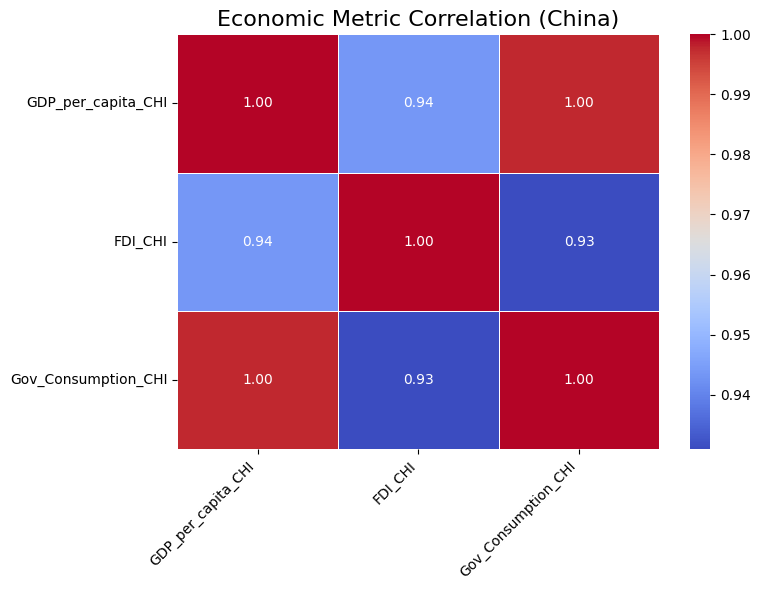

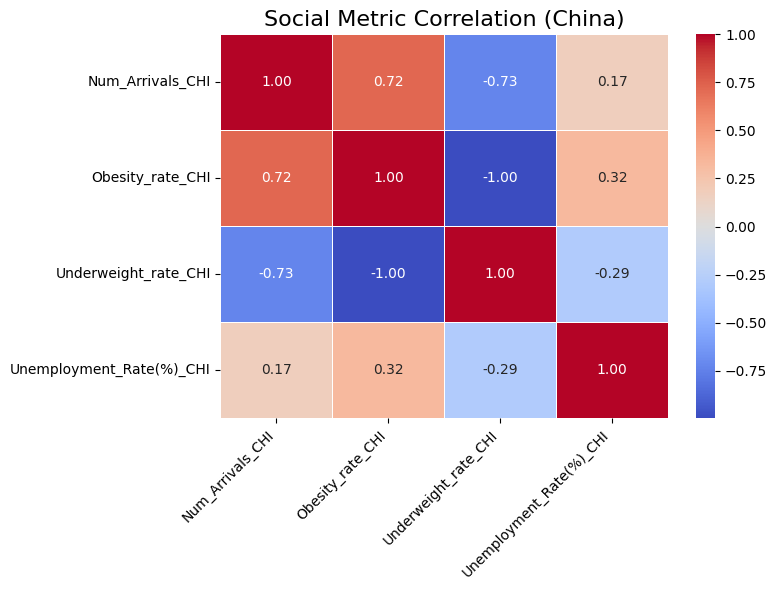

In [129]:
plot_all_heatmaps(correlation_matrices, metric_groups)

2. Cross group Correlation

Select from a range of important metric combinations, and see how they correlated to each other in scattorplot


Available Metric Combinations:
1: Do GDP and FDI correlated?
2: How does fiscal policy impact government consumption?
3: Does tourism impact economic growth?
4: Health trade-offs
5: Environmental cost of economic growth
6: Does increasing tourism lead to higher GHG emission?
7: Economic growth's effect on employment

Selected combination: Do GDP and FDI correlated?

Selected country suffix: AUS
Checking columns: GDP_per_capita_AUS and FDI_AUS

Correlation between GDP_per_capita and FDI in AUS: -0.19


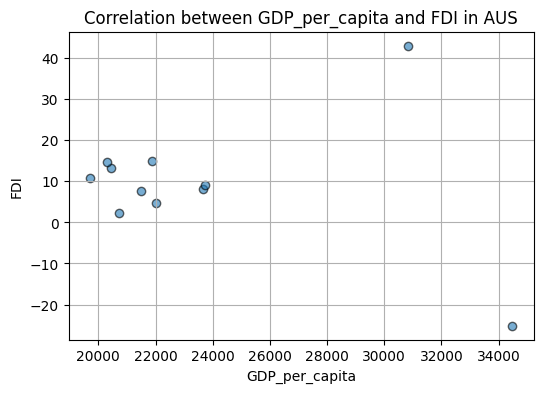

In [131]:
predefined_correlation_analysis(merged_data)

Use bar plots to compare the correlation strength of specific metric pairs (e.g., GDP vs FDI) between Australia and China.

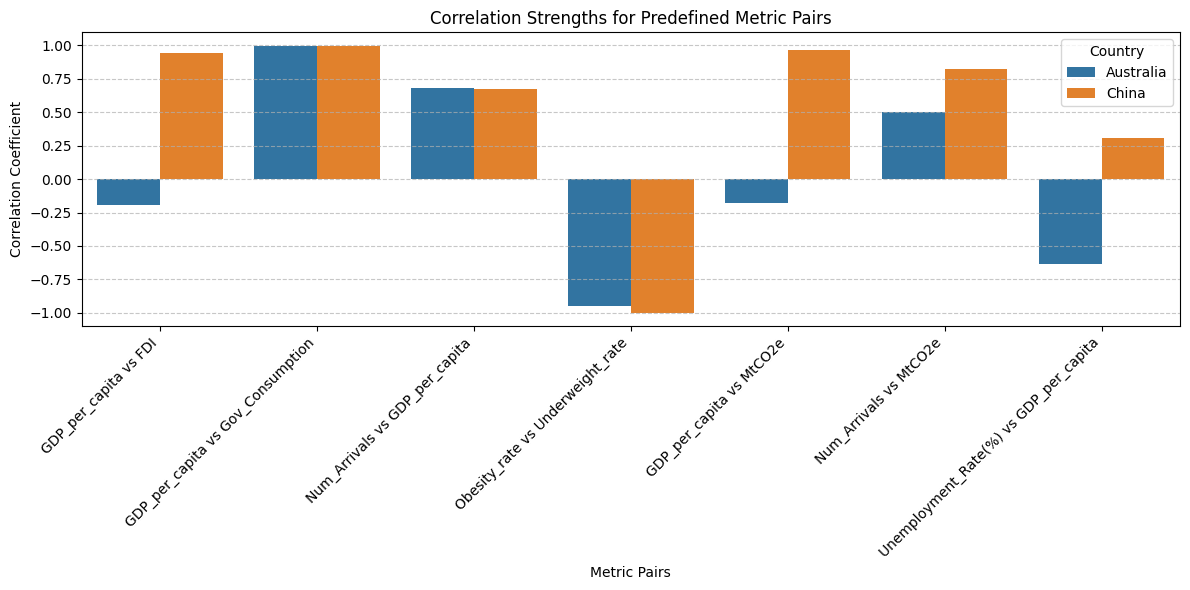

In [132]:
# Assuming predefined_combinations and merged_data are already defined
plot_predefined_combinations_bar(predefined_combinations, merged_data)

This analysis focuses on the period surrounding the Olympic Games in Australia (1995-2005) and China (2003-2013) to examine the potential impacts of hosting the Olympics on various socioeconomic and environmental metrics. The high positive correlation between "GDP per capita" and "Government Consumption" in both countries suggests that government spending on infrastructure and services during this period may have contributed significantly to economic growth, potentially reflecting the large-scale investments required for hosting the Olympics. The strong correlation between "Num Arrivals" and "GDP per capita" in China, compared to its absence in Australia, might indicate that China's economic growth during this period was more closely tied to tourism, possibly due to increased international attention as the Olympics approached. The contrasting correlations for "Obesity rate vs Underweight rate" reveal divergent public health challenges: Australia's negative correlation suggests distinct regional health outcomes, while China's positive correlation points to overlapping nutritional disparities that may be intensified by uneven development. Additionally, the weaker correlation between "GDP per capita" and "MtCO2e" in Australia, compared to China, could reflect differences in how economic growth and industrialization were managed, with China's rapid urbanization and industrial expansion likely contributing more significantly to emissions.

When applying this framework to the eight countries, it becomes clear that hosting the Olympics serves as a lens through which existing national priorities and disparities are magnified. Countries with stronger economic resilience, like Australia, Canada, and Spain, often showcase more balanced and sustainable growth across economic, social, and environmental dimensions.The Olympics thus act as both a catalyst for progress and a stress test for national systems。